# Transforming agents

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import pandas
import pickle
import numpy
import datetime
import math
import os
import scipy
import battery_size_functions
import imp
imp.reload(battery_size_functions)

<module 'battery_size_functions' from '/home/ignavermeulen/modeling_charging_behavior/battery_size_functions.py'>

In [26]:
bin_size = 20
max_dc = int(40 * 60 * 24 / bin_size)
max_con = int(5 * 60 * 24 / bin_size)

In [27]:
file_detail = '_bin' + str(bin_size)
# file_detail = ''
% time data_agents = battery_size_functions.load_dict_agents_data('data/agent_database/all_non_changing_agents' + file_detail + '/')

CPU times: user 48 s, sys: 904 ms, total: 48.9 s
Wall time: 48.9 s


In [28]:
print('loading distributions')
directory = 'data/simulation_pkls/'
with open(directory + 'disconnection_distribution_phev.pkl', 'rb') as f:
    disconnection_distribution_phev = pickle.load(f)
with open(directory + 'disconnection_distribution_high_fev.pkl', 'rb') as f:
    disconnection_distribution_high_fev = pickle.load(f)
with open(directory + 'disconnection_distribution_low_fev.pkl', 'rb') as f:
    disconnection_distribution_low_fev = pickle.load(f)
with open(directory + 'connection_distribution_phev.pkl', 'rb') as f:
    connection_distribution_phev = pickle.load(f)
with open(directory + 'connection_distribution_high_fev.pkl', 'rb') as f:
    connection_distribution_high_fev = pickle.load(f)
with open(directory + 'connection_distribution_low_fev.pkl', 'rb') as f:
    connection_distribution_low_fev = pickle.load(f)
# with open(directory + 'transformation_disconnection_phev_to_high.pkl', 'rb') as f:
#     diff_dc_phev_to_high = pickle.load(f)
# with open(directory + 'transformation_disconnection_phev_to_low.pkl', 'rb') as f:
#     diff_dc_phev_to_low = pickle.load(f)
# with open(directory + 'transformation_connection_phev_to_high.pkl', 'rb') as f:
#     diff_con_phev_to_high = pickle.load(f)
# with open(directory + 'transformation_connection_phev_to_low.pkl', 'rb') as f:
#     diff_con_phev_to_low = pickle.load(f)
print('done')

loading distributions
done


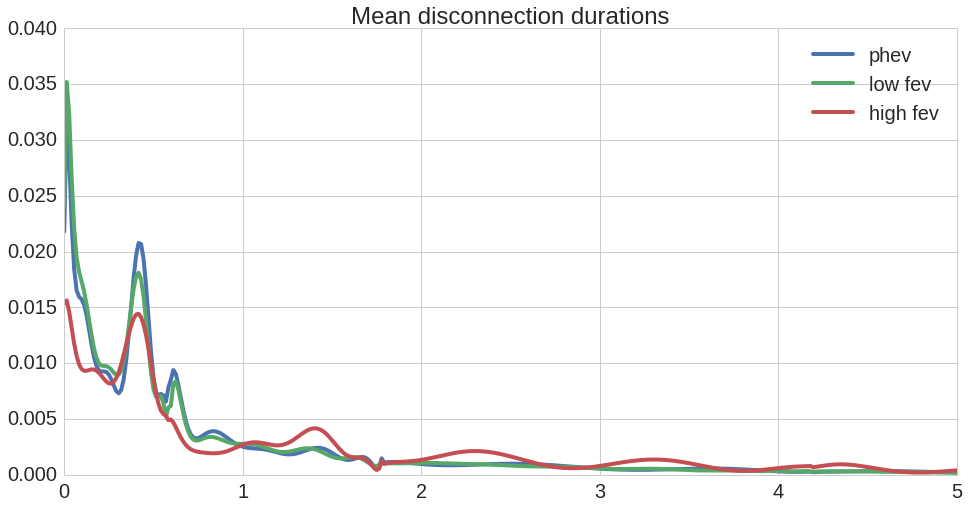

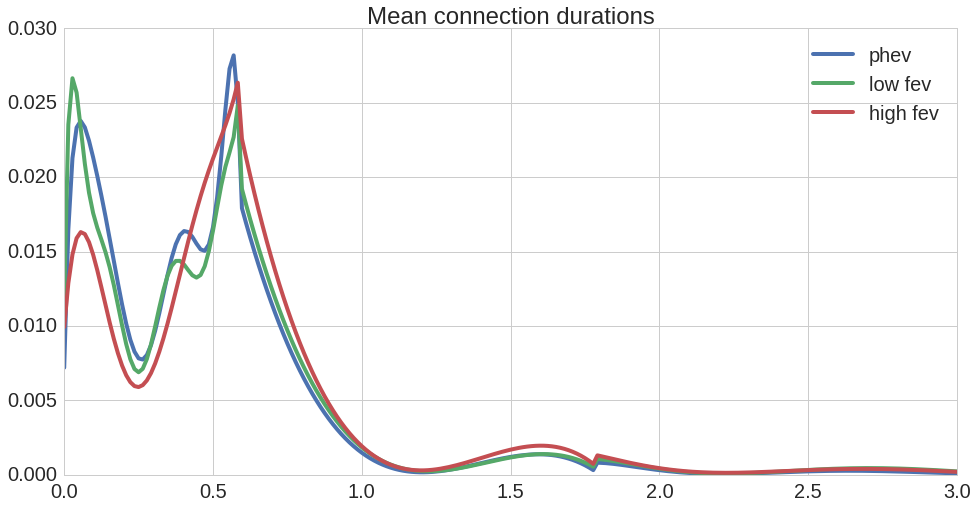

In [31]:
dc_xvals = [i * 20 / 60 / 24 for i in range(max_dc)]
con_xvals = [i * 20 / 60 / 24 for i in range(max_con)]
dc_yvals = [disconnection_distribution_phev[:max_dc], disconnection_distribution_low_fev[:max_dc],
           disconnection_distribution_high_fev[:max_dc]]
dc_ylabs = ['phev', 'low fev', 'high fev']
con_yvals = [connection_distribution_phev[:max_con], connection_distribution_low_fev[:max_con],
            connection_distribution_high_fev[:max_con]]
con_ylabs = ['phev', 'low fev', 'high fev']
battery_size_functions.simple_plot_mult_dist(dc_xvals, dc_yvals, dc_ylabs, title = 'Mean disconnection durations', xmax = 5)
battery_size_functions.simple_plot_mult_dist(con_xvals, con_yvals, con_ylabs, title = 'Mean connection durations', xmax = 3)

In [34]:
dc_normed_phev = battery_size_functions.convert_to_normed_list(disconnection_distribution_phev, max_dc)
dc_normed_high_fev = battery_size_functions.convert_to_normed_list(disconnection_distribution_high_fev, max_dc)
dc_normed_low_fev = battery_size_functions.convert_to_normed_list(disconnection_distribution_low_fev, max_dc)
con_normed_phev = battery_size_functions.convert_to_normed_list(connection_distribution_phev, max_con)
con_normed_high_fev = battery_size_functions.convert_to_normed_list(connection_distribution_high_fev, max_con)
con_normed_low_fev = battery_size_functions.convert_to_normed_list(connection_distribution_low_fev, max_con)


print(battery_size_functions.get_error(dc_normed_phev, dc_normed_high_fev), battery_size_functions.get_hellinger_distance(dc_normed_phev, dc_normed_high_fev))
print(battery_size_functions.get_error(dc_normed_phev, dc_normed_low_fev), battery_size_functions.get_hellinger_distance(dc_normed_phev, dc_normed_low_fev))
print(battery_size_functions.get_error(dc_normed_high_fev, dc_normed_low_fev), battery_size_functions.get_hellinger_distance(dc_normed_high_fev, dc_normed_low_fev))

print(battery_size_functions.get_error(con_normed_phev, con_normed_high_fev), battery_size_functions.get_hellinger_distance(con_normed_phev, con_normed_high_fev))
print(battery_size_functions.get_error(con_normed_phev, con_normed_low_fev), battery_size_functions.get_hellinger_distance(con_normed_phev, con_normed_low_fev))
print(battery_size_functions.get_error(con_normed_high_fev, con_normed_low_fev), battery_size_functions.get_hellinger_distance(con_normed_high_fev, con_normed_low_fev))


0.0139752204523 0.171930444919
0.00416405507861 0.048307051743
0.0136099443191 0.172425739613
0.0726711228949 0.101860979471
0.0369664498463 0.0638901498279
0.0597793833968 0.0871826723955


### Check: single distribution

In [ ]:
t = get_transform_factors(dc_normed_phev, dc_normed_high_fev)
x = transform(dc_normed_low_fev, t)
dc_xvals = [i * 20 / 60 / 24 for i in range(dc_max)]
ylabs = ['phev', 'high fev', 'transformed']
yvals = [dc_normed_phev, dc_normed_high_fev, x]
simple_plot_mult_dist(dc_xvals, yvals, ylabs, title = '', xmax = 5)

### Check: single agent distribution 

In [54]:
dc_dists_agents = {}
for ID in data_agents:
    dc_dists_agents[ID] = sum_distributions(data_agents[ID]['disconnection_duration_dists'])

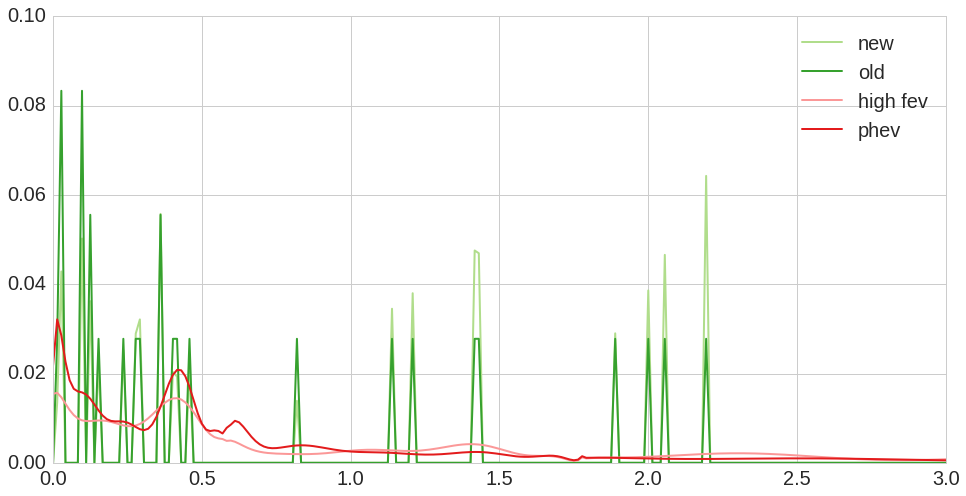

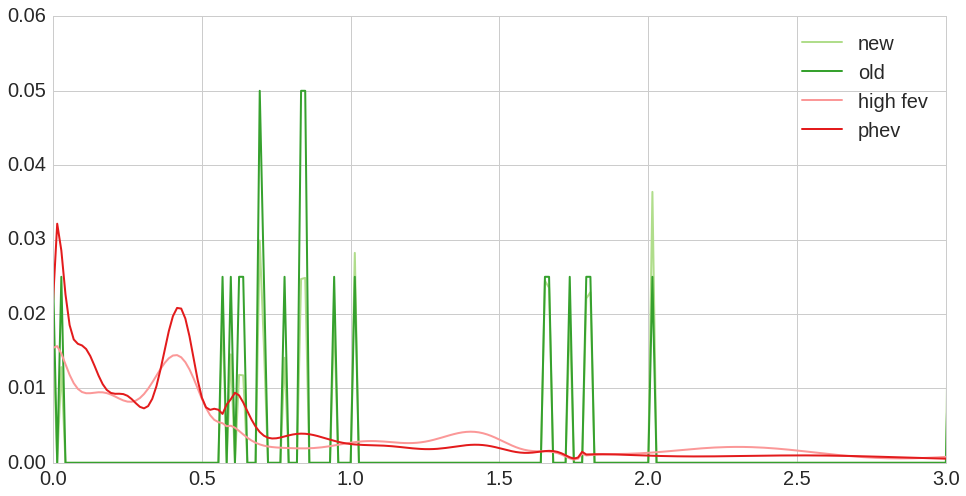

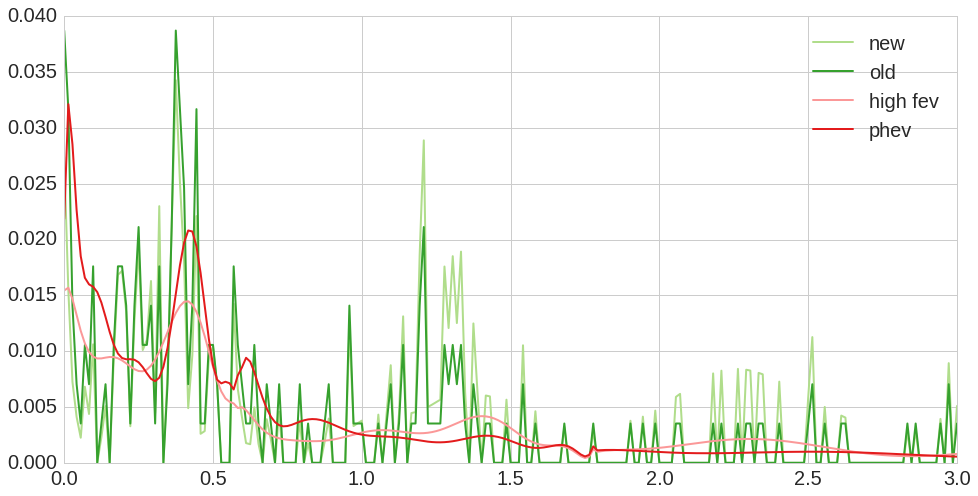

In [91]:
t = get_transform_factors(dc_normed_phev, dc_normed_high_fev)
xvals = [i * 20 / 60 / 24 for i in range(len(t))]
for i, ID in enumerate(dc_dists_agents):
    if i > 3:
        break
    if data_agents[ID]['battery_category'] != 'phev':
        continue
    dist = list(dc_dists_agents[ID])
    while (len(dist) < len(t)):
            dist.append(0.0)
    dist = dist[:len(t)]
    dist = convert_to_normed_list(dist, len(t))
    new_dist = transform(dist, t)
    simple_plot_mult_dist(xvals, [new_dist, dist,  dc_normed_high_fev, dc_normed_phev], 
                          ['new','old', 'high fev', 'phev'], xmax = 3, linewidth = 2,
                          colors = list(seaborn.color_palette("Paired", 6))[2:6])

### Check: single agent

In [173]:
import sys
import datetime

import simulation
import data_handler
import environment
import agent 

import imp
imp.reload(agent)
imp.reload(simulation)
imp.reload(data_handler)
imp.reload(environment)

<module 'environment' from '/home/ignavermeulen/modeling_charging_behavior/environment.py'>

In [174]:
%time sim = simulation.Simulation("data/input_parameters/parameters.json", \
    overwrite_parameters = {'agent_initialization': 'load_and_use', \
    'filepath_agent_database': 'data/agent_database/all_non_changing_agents/', 'number_of_agents': 10, \
    'transform_parameters': { \
            "prob_no_transform": 1.0, \
            "prob_to_low_fev": 0.0, \
            "prob_to_high_fev": 0.0 \
          }, \
    'agent_creation_method': 'random', \
    'agent_IDs': ['ED984ED74DE3FB028AB32398F54B39E11428B5EBEB93D1C95A0F880721840C73', \
                  '51D1F1D5E18DA0E658443C436684A50D7FF2F553D3B651AD37C839082A1264BE', \
                  '3169D0D7B3168EC70C595FE9F6B03E9051495AFB420440CCEED363BBE795D9DB', \
                  '7B79B6458ECC90EE58B30BA903257AB719EE109AC9B2D49A6535E0C418F7417A', \
                  '032CD719366F497813DB007EBE7E728C7D009C40AA39681AE09C8FE71CEC5F88'], \
    'skip_high_fev_agents': True, \
    'skip_low_fev_agents': True})

INFO: Initialization
	INFO: Loading sessions took 1.89 seconds
	INFO: Detailed preprocessing took 2.65 seconds
	INFO: Initializing (load_and_use) 10 random agents
		INFO: 10 of 10 agents are initialized
			INFO: 11 of 2287 users are processed
		INFO: Initialized 10 agents in 1.78 seconds
	INFO: Initialization took 4.53 seconds
CPU times: user 4.13 s, sys: 404 ms, total: 4.54 s
Wall time: 4.68 s


In [175]:
original_agent_data = {}
for ID, agent in sim.agents.items():
    original_agent_data[ID] = agent._get_agent_data()

In [176]:
transformed_agent_data = {}
for ID, agent in sim.agents.items():
    agent._transform_agent('high_fev')
    transformed_agent_data[ID] = agent._get_agent_data()

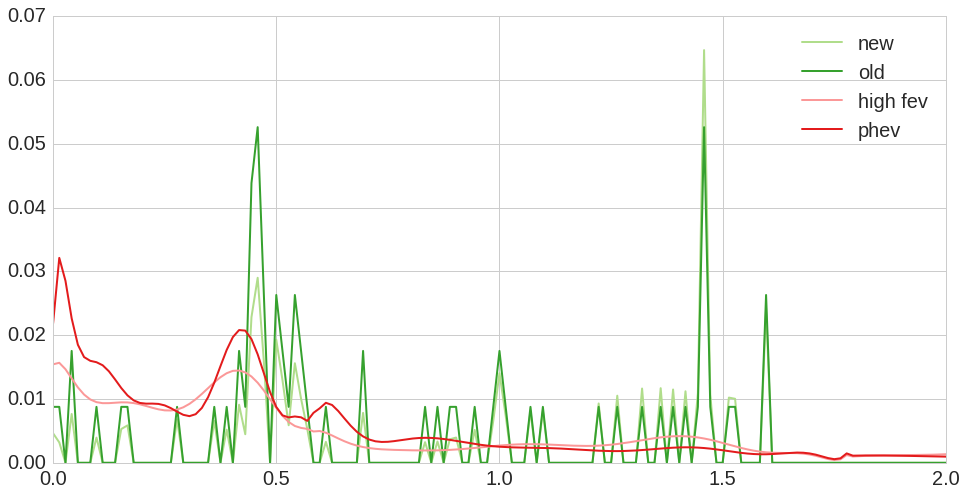

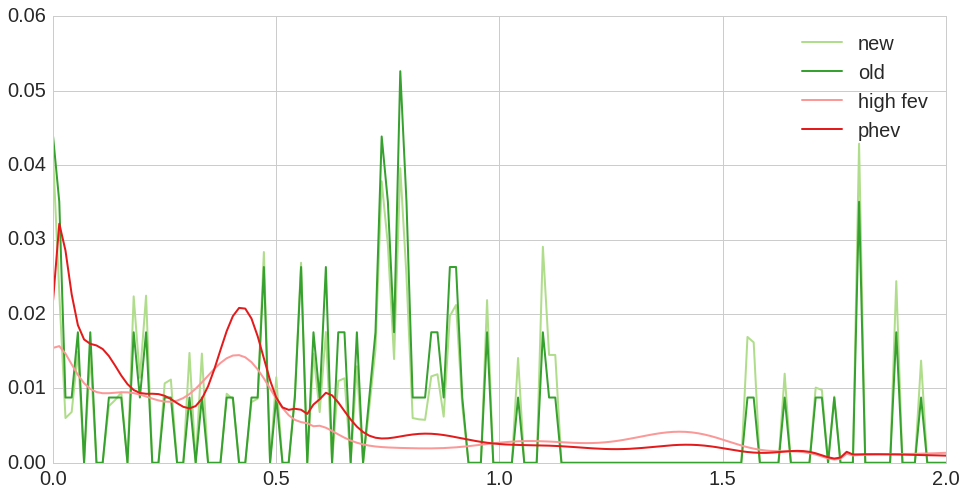

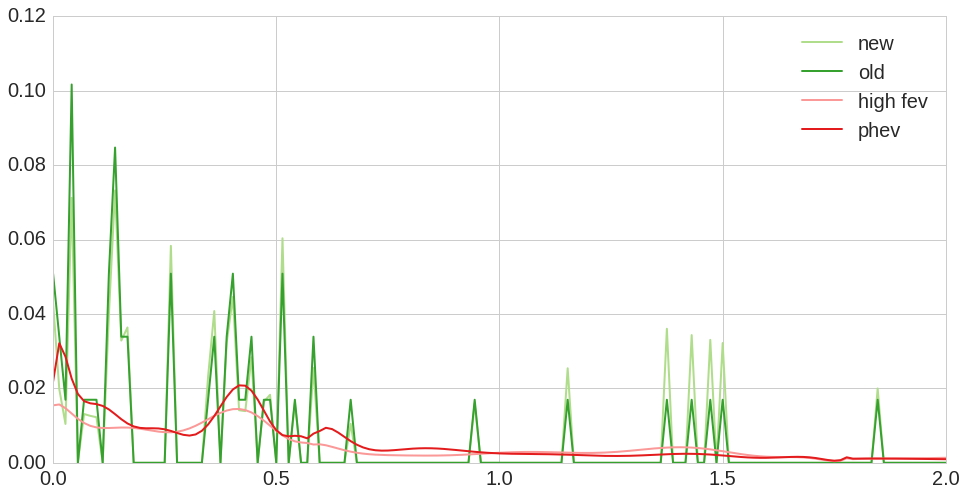

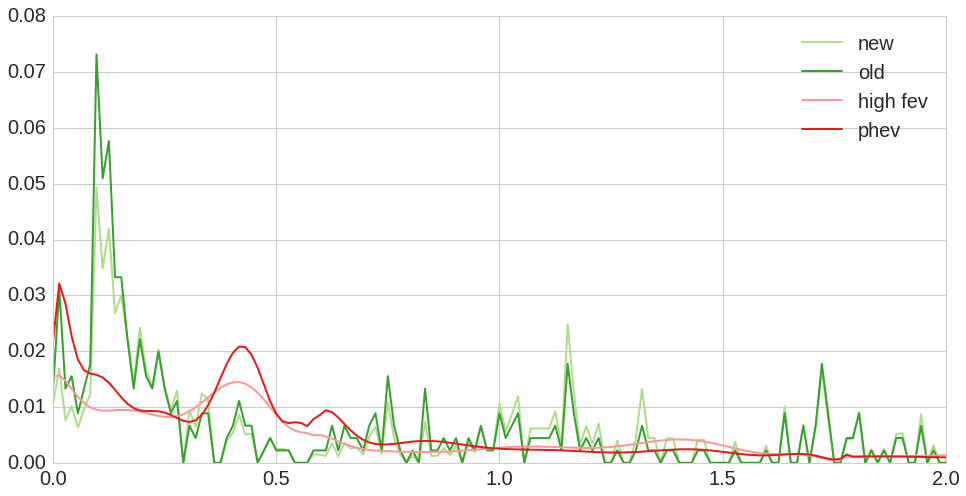

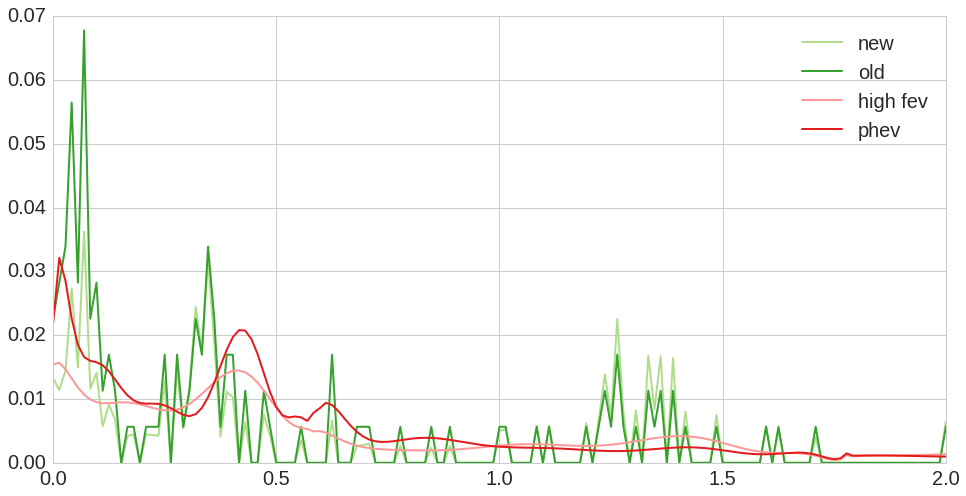

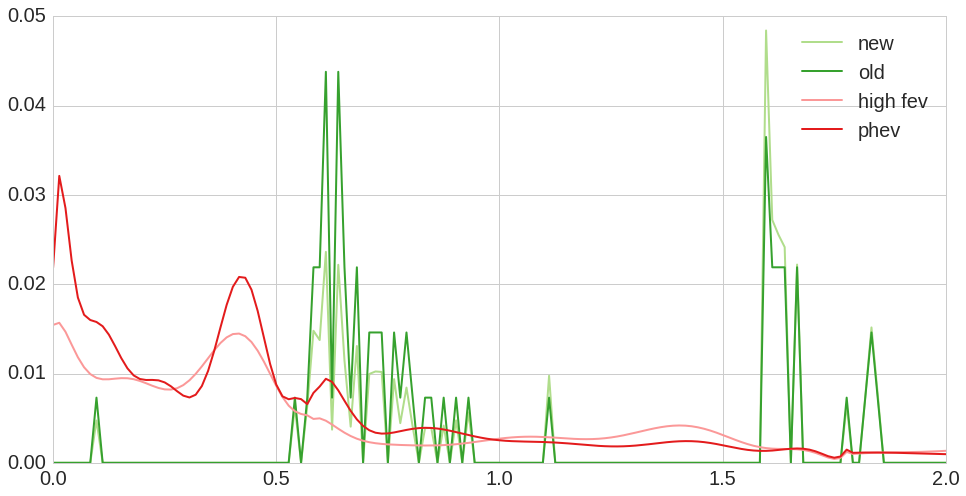

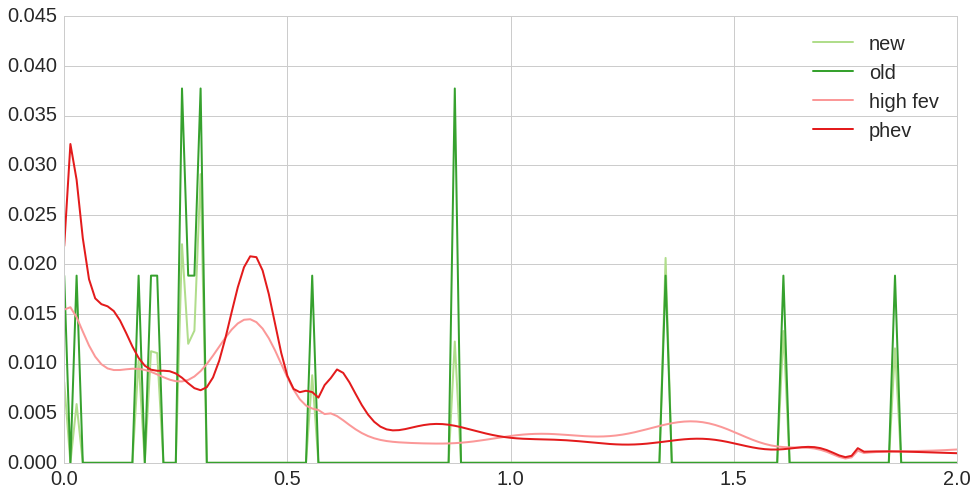

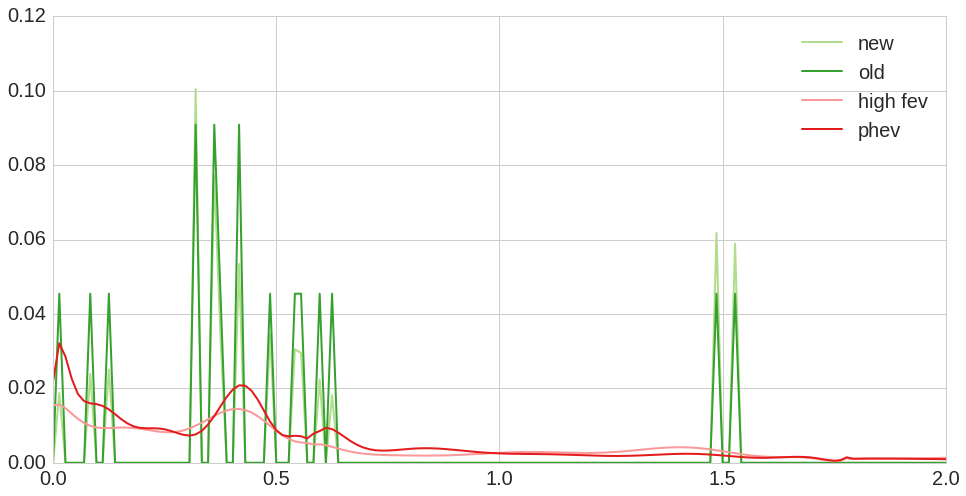

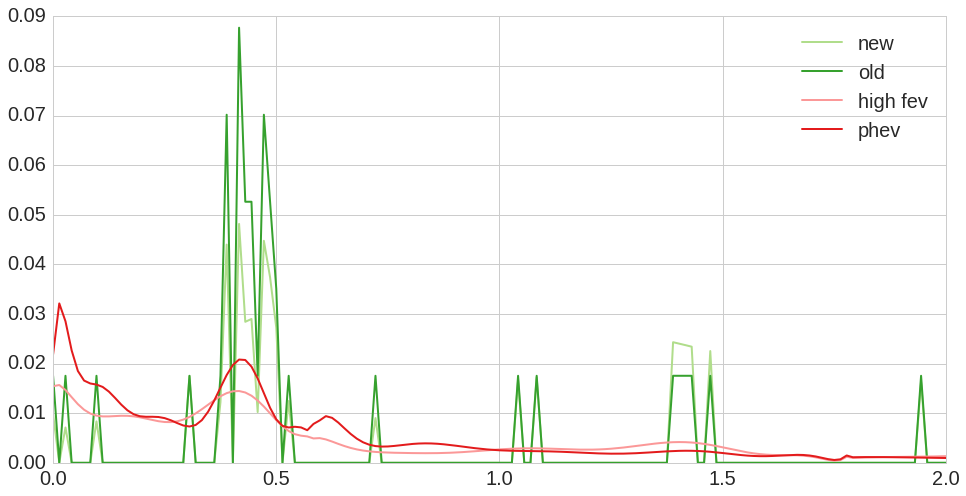

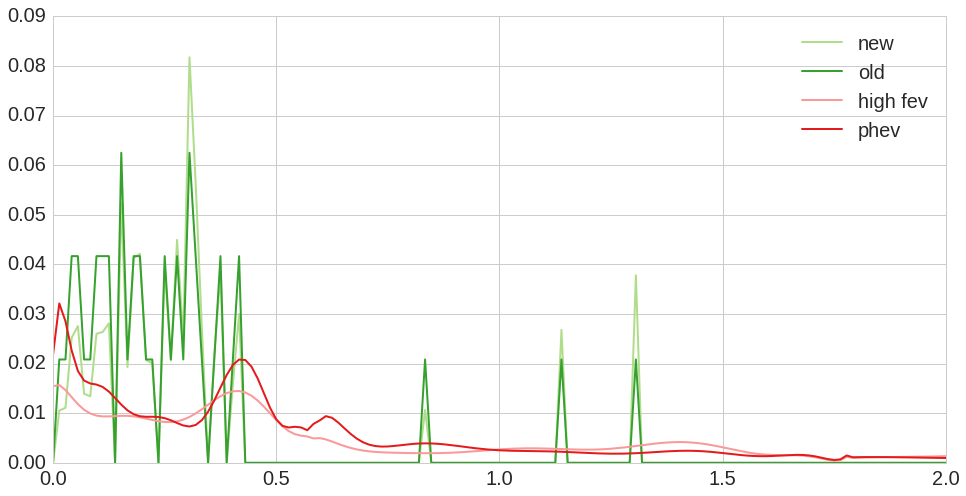

In [177]:
for ID, agent in sim.agents.items():
    dist = list(sum_distributions(original_agent_data[ID]['disconnection_duration_dists'], as_type = 'float'))
    while (len(dist) < dc_max):
        dist.append(0.0)
    dist = dist[:dc_max]
    dist = convert_to_normed_list(dist, dc_max)
    new_dist = list(sum_distributions(transformed_agent_data[ID]['disconnection_duration_dists'], as_type = 'float'))
    while (len(new_dist) < dc_max):
        new_dist.append(0.0)
    new_dist = new_dist[:dc_max]
    new_dist = convert_to_normed_list(new_dist, dc_max)
    simple_plot_mult_dist(xvals, [new_dist, dist, dc_normed_high_fev, dc_normed_phev], 
        ['new','old', 'high fev', 'phev'], xmax = 2, linewidth = 2, 
        colors = list(seaborn.color_palette("Paired", 6))[2:6])

### Check: multiple agents

Run simulation in either phev_to_high_simulation or phev_to_low_simulation and load the results here

In [199]:
import sys
import datetime

import simulation
import data_handler
import environment
import agent 

import imp
imp.reload(agent)
imp.reload(simulation)
imp.reload(data_handler)
imp.reload(environment)

<module 'environment' from '/home/ignavermeulen/modeling_charging_behavior/environment.py'>

In [200]:
%time sim = simulation.Simulation("data/input_parameters/parameters.json", \
    overwrite_parameters = {'agent_initialization': 'load_and_use', \
    'filepath_agent_database': 'data/agent_database/all_non_changing_agents/', 'number_of_agents': 10, \
    'transform_parameters': { \
            "prob_no_transform": 1.0, \
            "prob_to_low_fev": 0.0, \
            "prob_to_high_fev": 0.0 \
          }, \
    'agent_creation_method': 'random', \
    'skip_high_fev_agents': True, \
    'skip_low_fev_agents': True})

INFO: Initialization
	INFO: Loading sessions took 1.79 seconds
	INFO: Detailed preprocessing took 2.52 seconds
	INFO: Initializing (load_and_use) 10 random agents
		INFO: 10 of 10 agents are initialized
			INFO: 13 of 2287 users are processed
		INFO: Initialized 10 agents in 2.03 seconds
	INFO: Initialization took 4.65 seconds
CPU times: user 4.41 s, sys: 292 ms, total: 4.7 s
Wall time: 4.79 s


In [201]:
original_agent_data = {}
for ID, agent in sim.agents.items():
    original_agent_data[ID] = agent._get_agent_data()

In [202]:
transformed_agent_data = {}
for ID, agent in sim.agents.items():
    agent._transform_agent('high_fev')
    transformed_agent_data[ID] = agent._get_agent_data()

In [36]:
# with open('data/sessions/ChargeSessions_simulated_phev_to_high.pkl', 'rb') as f:
#     data_phev_to_high = pickle.load(f)
# with open('data/sessions/ChargeSessions_simulated_phev_to_low.pkl', 'rb') as f:
#     data_phev_to_low = pickle.load(f)

directory = 'data/agent_database/phev_to_high_transformed_agents/'
phev_to_high_transformed_data = battery_size_functions.load_dict_agents_data(directory, check_regular = False)
directory = 'data/agent_database/phev_to_low_transformed_agents/'
phev_to_low_transformed_data = battery_size_functions.load_dict_agents_data(directory, check_regular = False)

### Disconnection (multiple agents)

In [55]:
imp.reload(battery_size_functions)

<module 'battery_size_functions' from '/home/ignavermeulen/modeling_charging_behavior/battery_size_functions.py'>

In [56]:
after, e_compute, e_naive, e_trans = battery_size_functions.validate_disconnection_patterns(phev_to_high_transformed_data, 
    disconnection_distribution_high_fev, disconnection_distribution_phev)
max_length = min(max_dc, len(after))
battery_size_functions.print_scores(e_compute, e_naive, e_trans)

pass on error not 0 (-0.0013) at end of determining shifting distance


In [57]:
battery_size_functions.print_scores(e_compute, e_naive, e_trans)

Errors: 		MAE;		Hellinger;	Shifting
Target and prediction: 	0.0070; 	0.1039, 	0.0069
Target and origin: 	0.0139; 	0.1717; 	0.0215
Origin and prediction: 	0.0158; 	0.1971; 	0.0267

MAE		 0.007; 0.499
Hellinger	 0.104; 0.394
Shifting	 0.007; 0.680


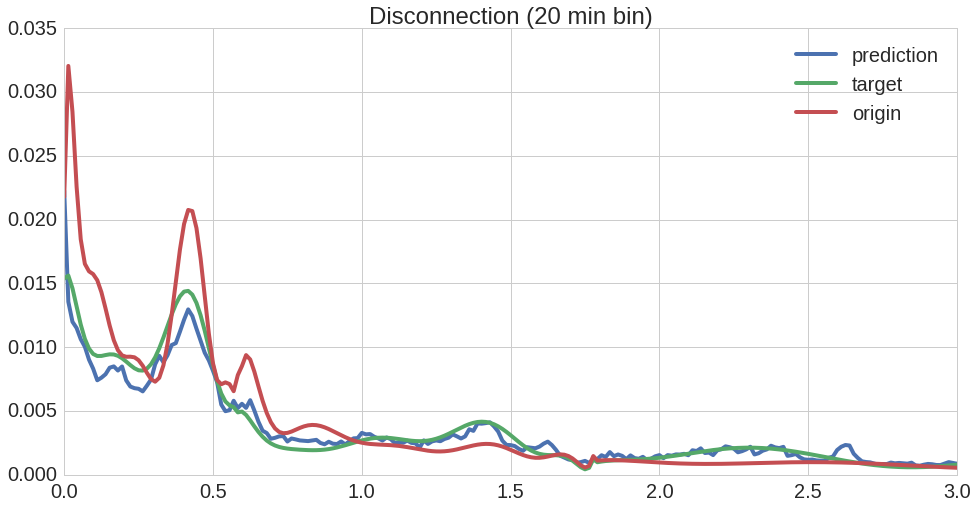

In [58]:
battery_size_functions.plot_validated_patterns(after, disconnection_distribution_high_fev, disconnection_distribution_phev, max_length,
    xmax = 3, title = 'Disconnection (%d min bin)' %bin_size)

In [61]:
after, e_compute, e_naive, e_trans = battery_size_functions.validate_disconnection_patterns(phev_to_low_transformed_data, 
    disconnection_distribution_low_fev, disconnection_distribution_phev)
max_length = min(max_dc, len(after))
battery_size_functions.print_scores(e_compute, e_naive, e_trans)

Errors: 		MAE;		Hellinger;	Shifting
Target and prediction: 	0.0079; 	0.1069, 	0.0111
Target and origin: 	0.0042; 	0.0483; 	0.0018
Origin and prediction: 	0.0076; 	0.1056; 	0.0095

MAE		 0.008; -0.899
Hellinger	 0.107; -1.215
Shifting	 0.011; -5.191


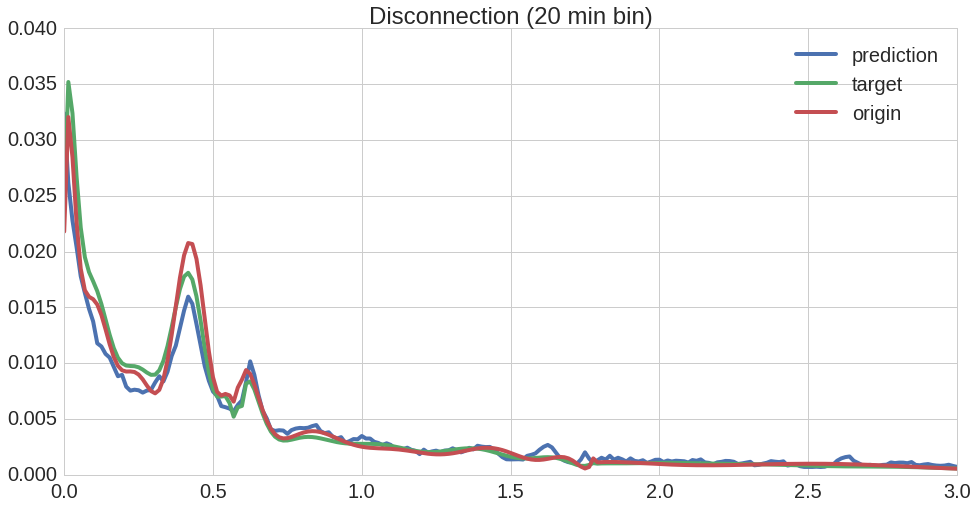

In [62]:
battery_size_functions.plot_validated_patterns(after, disconnection_distribution_low_fev, 
    disconnection_distribution_phev, max_length,
    xmax = 3, title = 'Disconnection (%d min bin)' %bin_size)

### Connection (multiple agents)

In [59]:
after, e_compute, e_naive, e_trans = battery_size_functions.validate_connection_patterns(phev_to_high_transformed_data, 
    connection_distribution_high_fev, connection_distribution_phev)
max_length = min(max_con, len(after))
battery_size_functions.print_scores(e_compute, e_naive, e_trans)

pass on error not 0 (-0.0013) at end of determining shifting distance
Errors: 		MAE;		Hellinger;	Shifting
Target and prediction: 	0.0679; 	0.1075, 	0.0201
Target and origin: 	0.0723; 	0.1017; 	0.0252
Origin and prediction: 	0.0476; 	0.0994; 	0.0073

MAE		 0.068; 0.061
Hellinger	 0.108; -0.057
Shifting	 0.020; 0.202


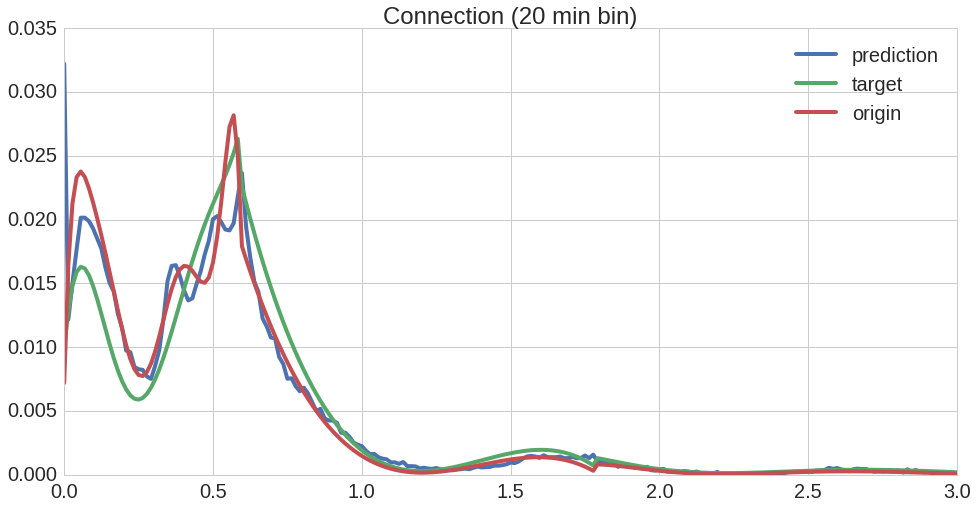

In [60]:
battery_size_functions.plot_validated_patterns(after, connection_distribution_high_fev, connection_distribution_phev, max_length,
    xmax = 3, title = 'Connection (%d min bin)' %bin_size)

In [63]:
after, e_compute, e_naive, e_trans = battery_size_functions.validate_connection_patterns(phev_to_low_transformed_data, 
    connection_distribution_low_fev, connection_distribution_phev)
max_length = min(max_con, len(after))
battery_size_functions.print_scores(e_compute, e_naive, e_trans)

pass on error not 0 (-0.0014) at end of determining shifting distance
Errors: 		MAE;		Hellinger;	Shifting
Target and prediction: 	0.0506; 	0.0887, 	0.0142
Target and origin: 	0.0369; 	0.0638; 	0.0132
Origin and prediction: 	0.0520; 	0.1085; 	0.0096

MAE		 0.051; -0.370
Hellinger	 0.089; -0.390
Shifting	 0.014; -0.079


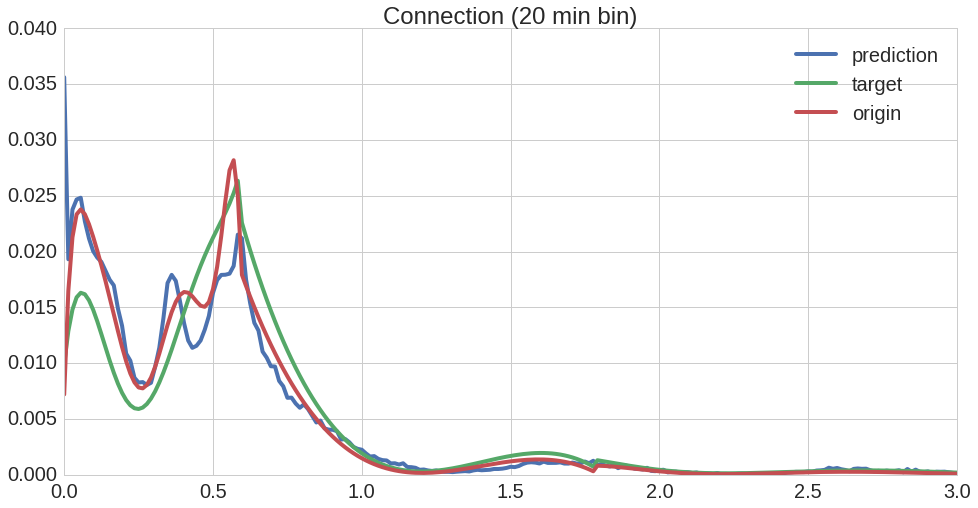

In [64]:
battery_size_functions.plot_validated_patterns(after, connection_distribution_high_fev, connection_distribution_phev, max_length,
    xmax = 3, title = 'Connection (%d min bin)' %bin_size)

In [211]:
summed_disconnection_distributions_after, summed_disconnection_distributions_before, resulting_distribution_disconnection, error_computing_dc, error_naive_dc, error_transformation_dc = validate_disconnection_patterns(transformed_agent_data, disconnection_distribution_high_fev, disconnection_distribution_phev, data_before_transform = original_agent_data)
max_length = min(dc_max, len(resulting_distribution_disconnection))

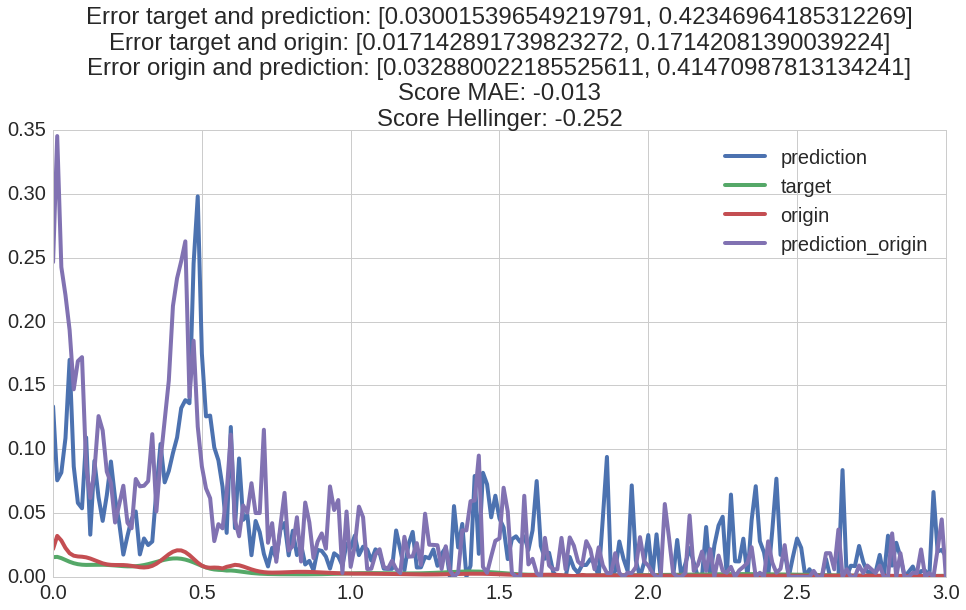

In [208]:
plot_validated_patterns(summed_disconnection_distributions, resulting_distribution_disconnection, 
    disconnection_distribution_high_fev, disconnection_distribution_phev, max_length,
    error_computing_dc, error_naive_dc, error_transformation_dc, xmax = 3, 
    before = summed_disconnection_distributions_before)

In [213]:
summed_disconnection_distributions_after, resulting_distribution_disconnection, error_computing_dc, error_naive_dc, error_transformation_dc = validate_disconnection_patterns(phev_to_high_transformed_data, disconnection_distribution_high_fev, disconnection_distribution_phev)
max_length = min(dc_max, len(resulting_distribution_disconnection))

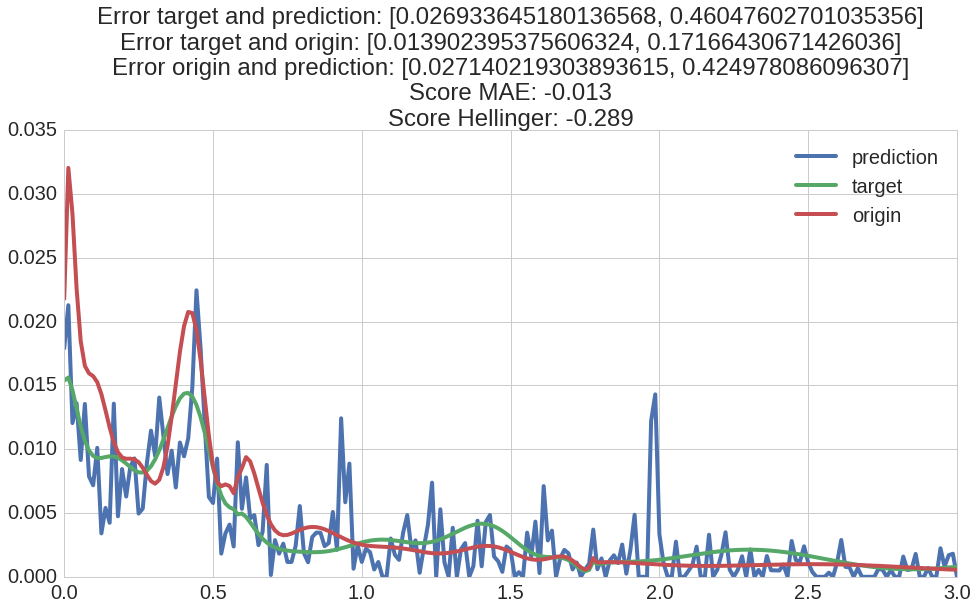

In [214]:
plot_validated_patterns(summed_disconnection_distributions_after, resulting_distribution_disconnection, 
    disconnection_distribution_high_fev, disconnection_distribution_phev, max_length,
    error_computing_dc, error_naive_dc, error_transformation_dc, xmax = 3)

### Hellinger distance versus shifted error measure

In [11]:
dc_dists_agents = {}
for ID in data_agents:
    dc_dists_agents[ID] = sum_distributions(data_agents[ID]['disconnection_duration_dists'])

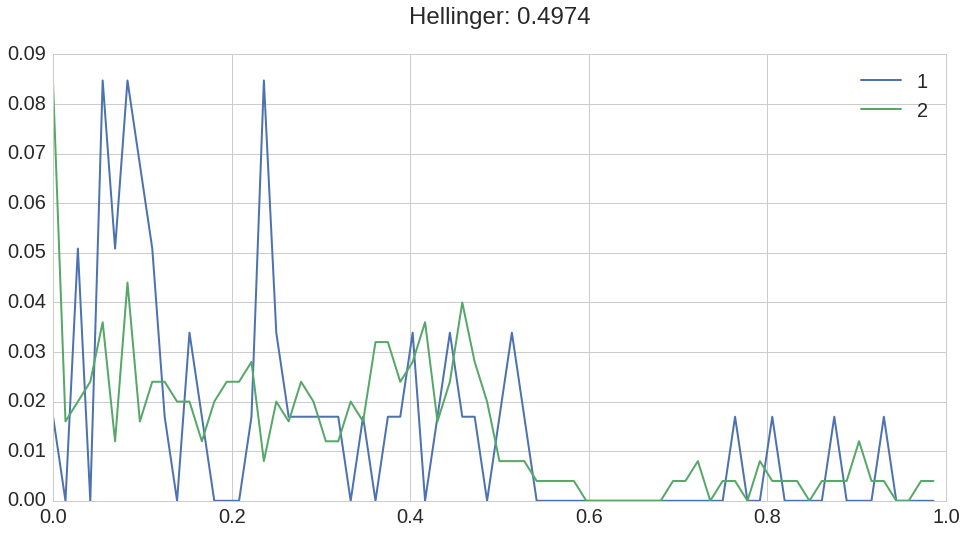

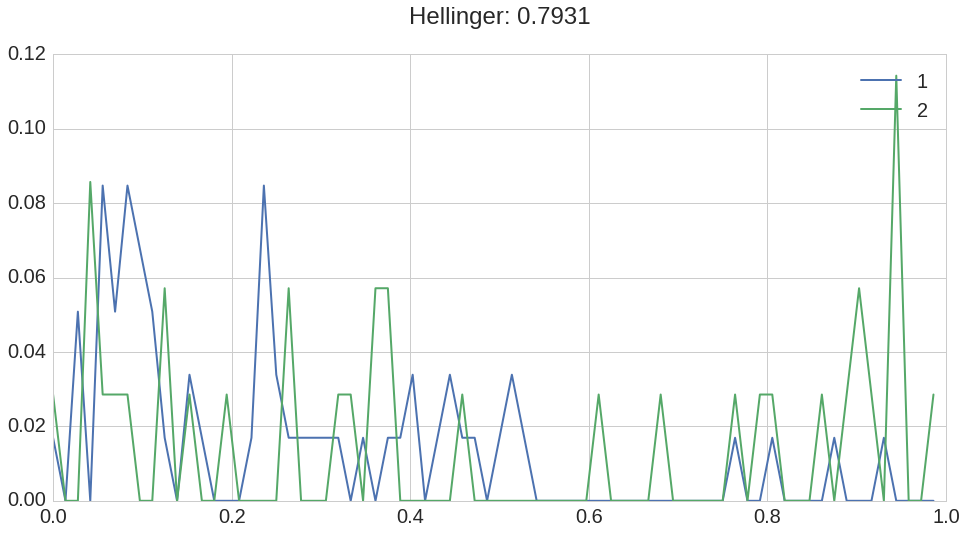

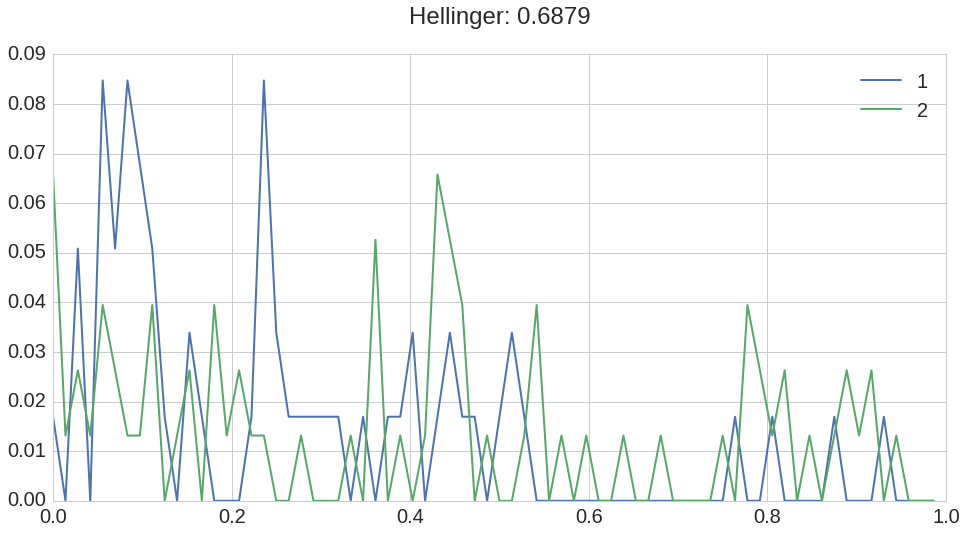

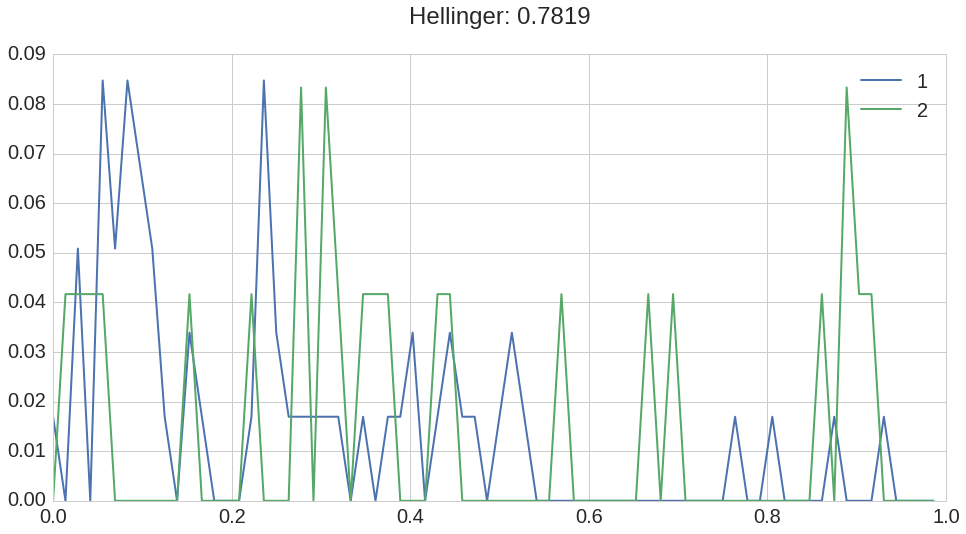

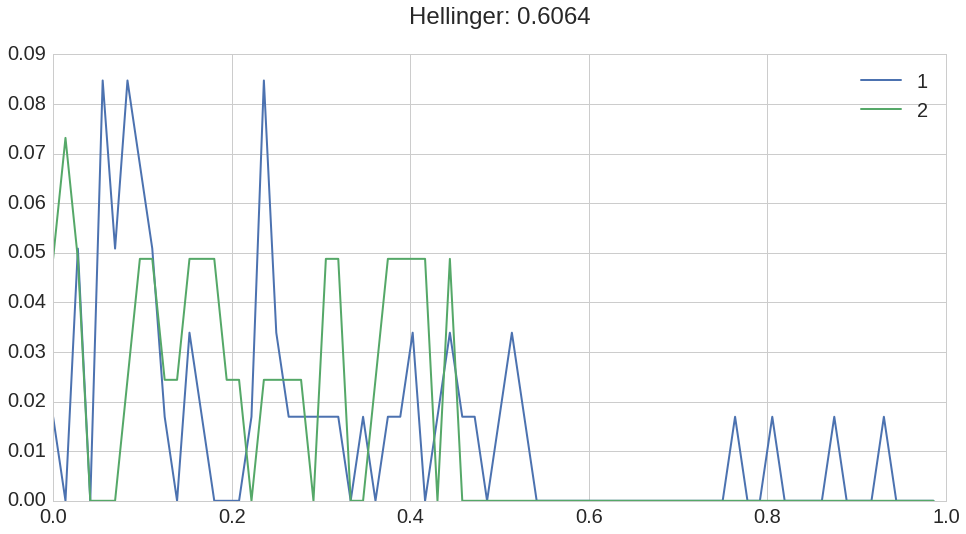

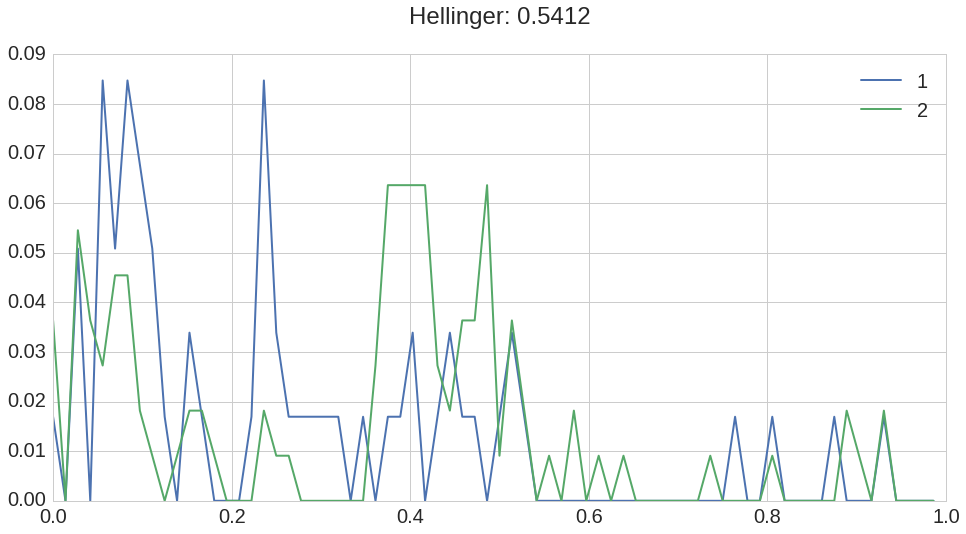

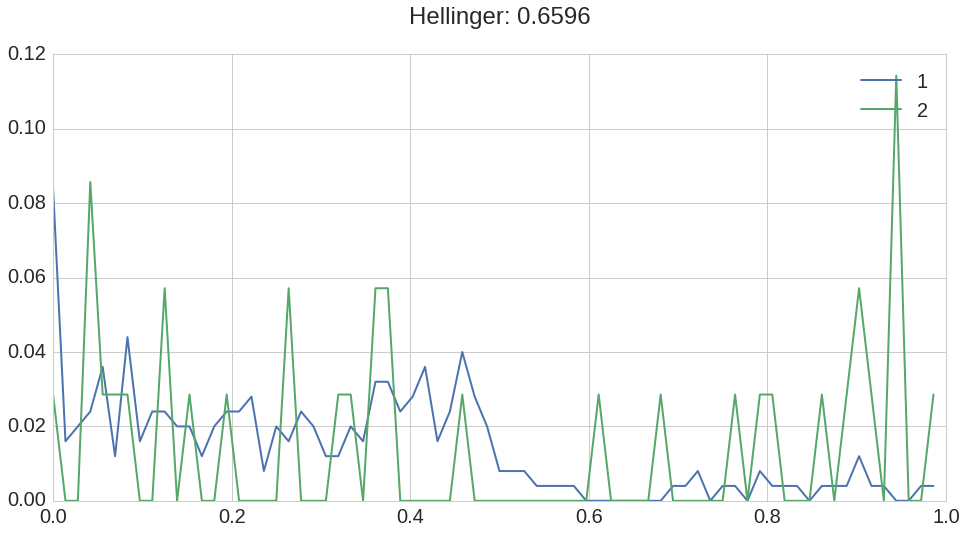

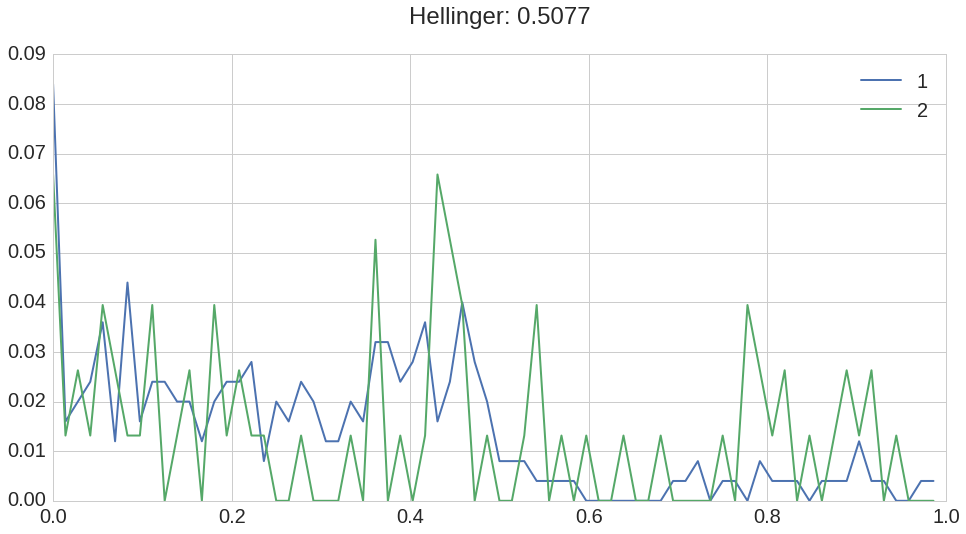

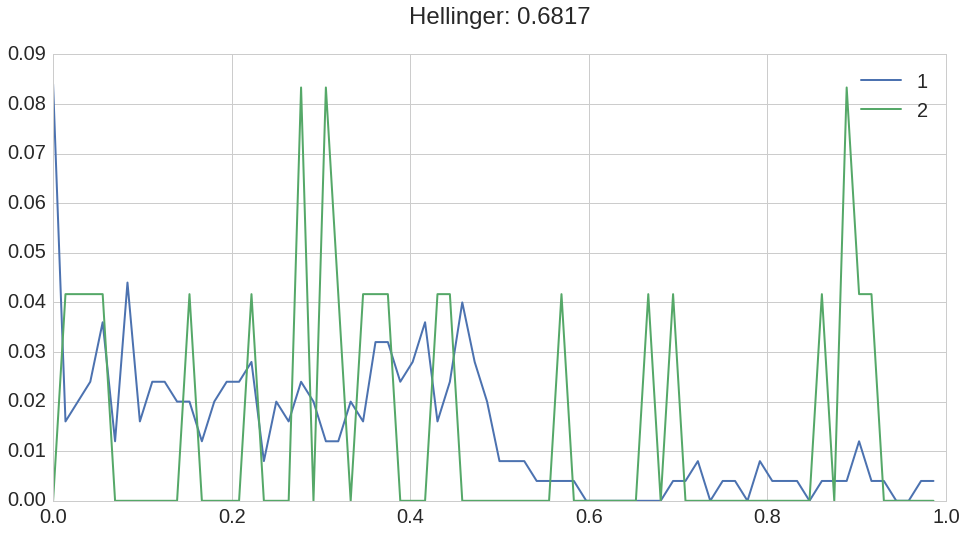

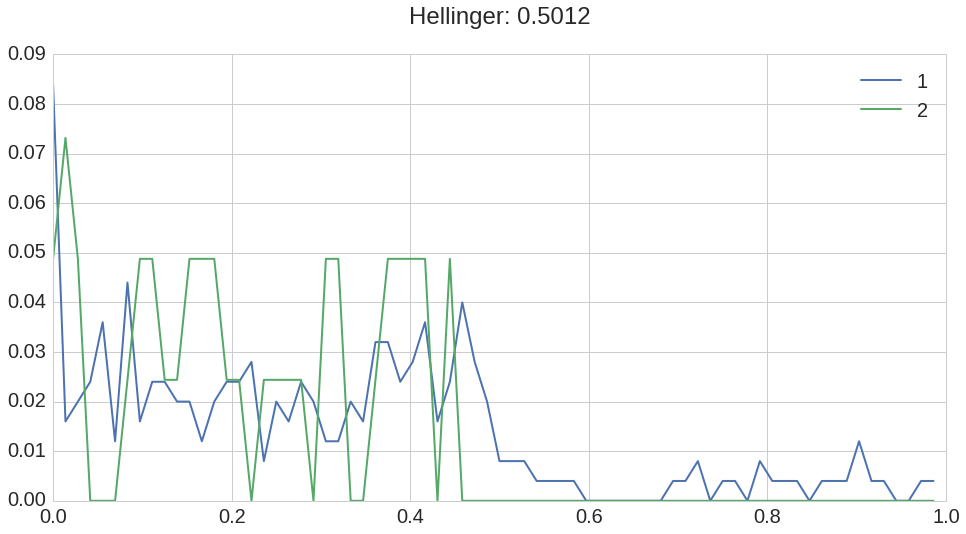

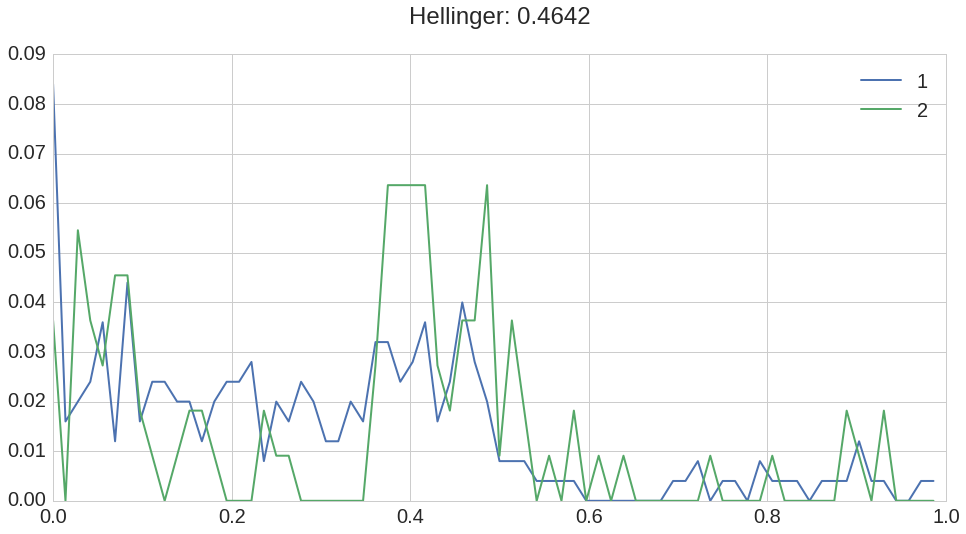

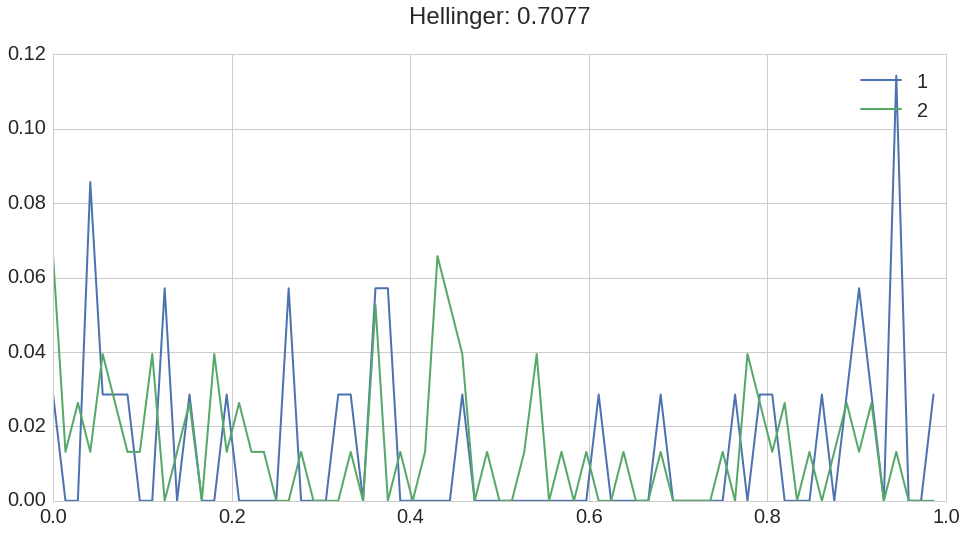

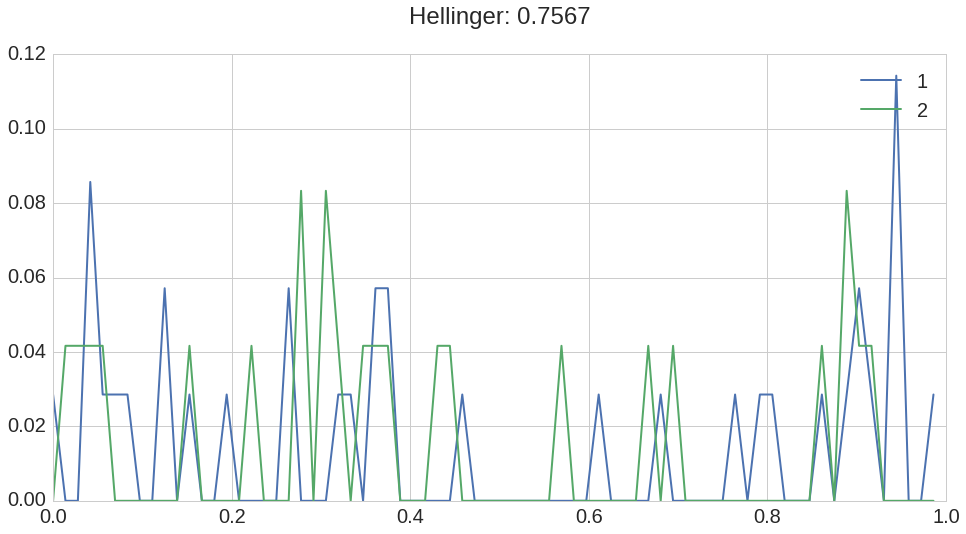

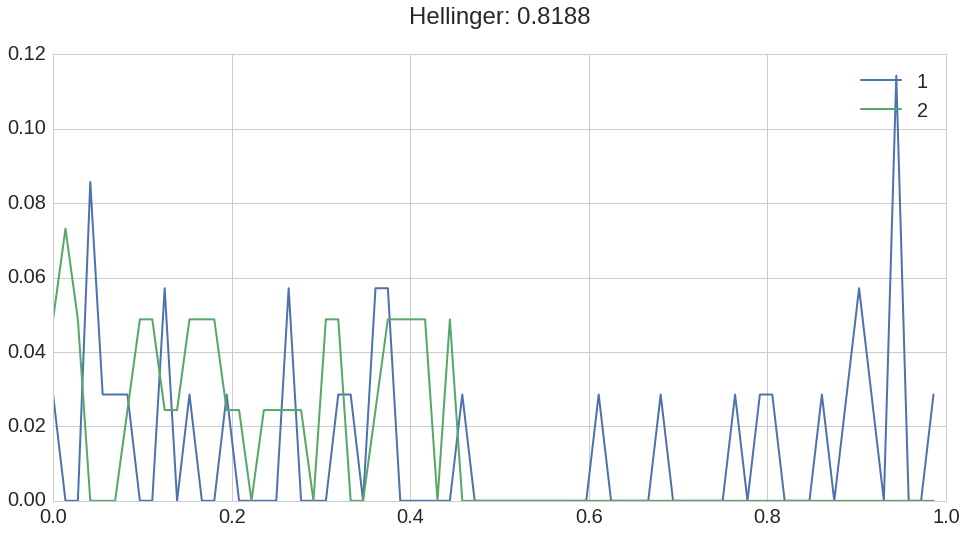

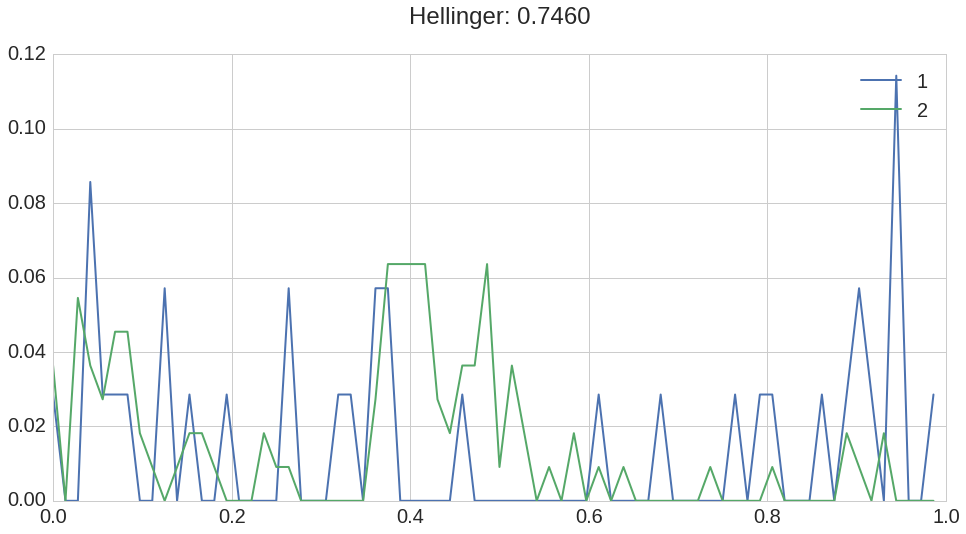

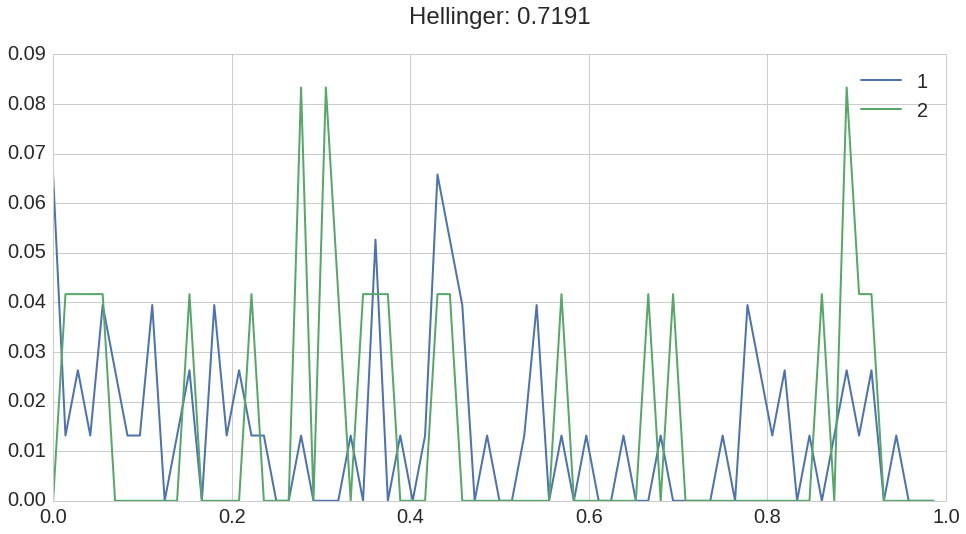

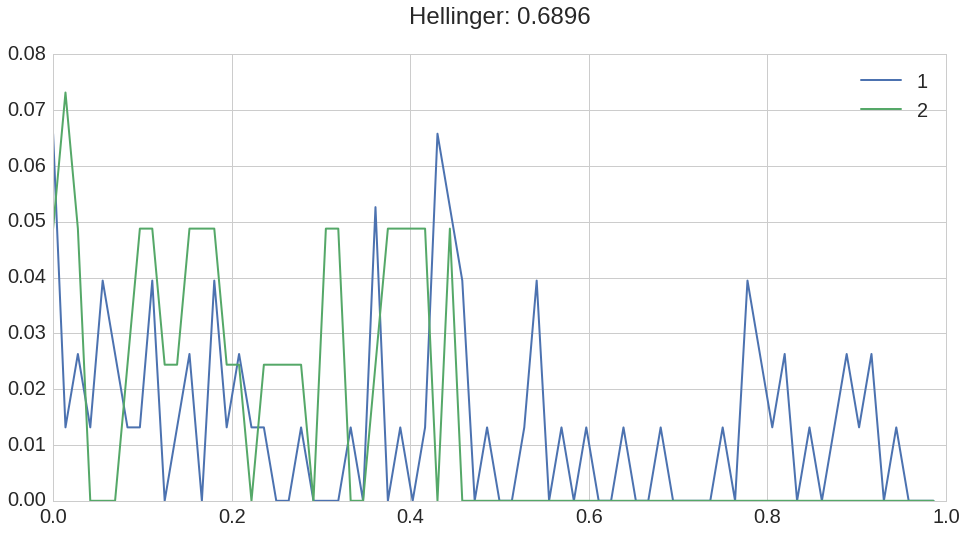

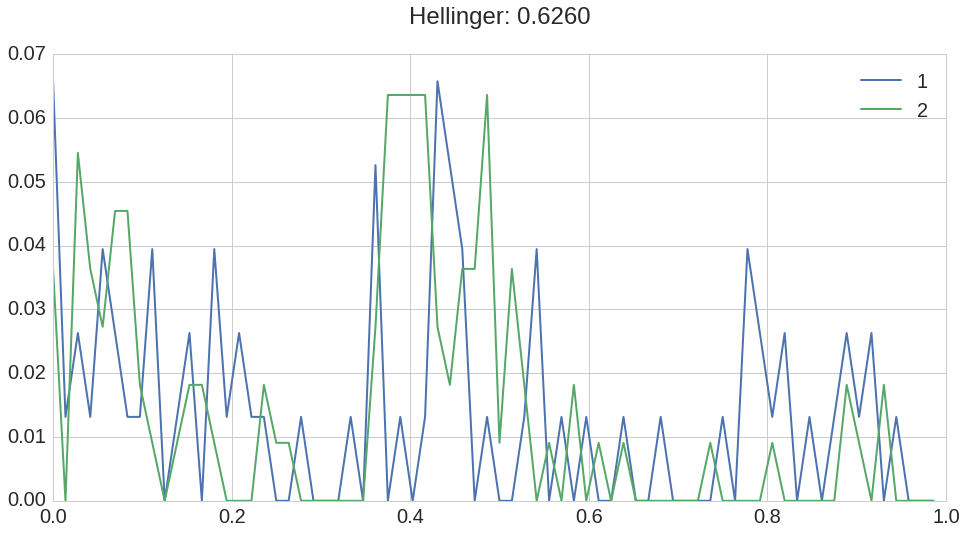

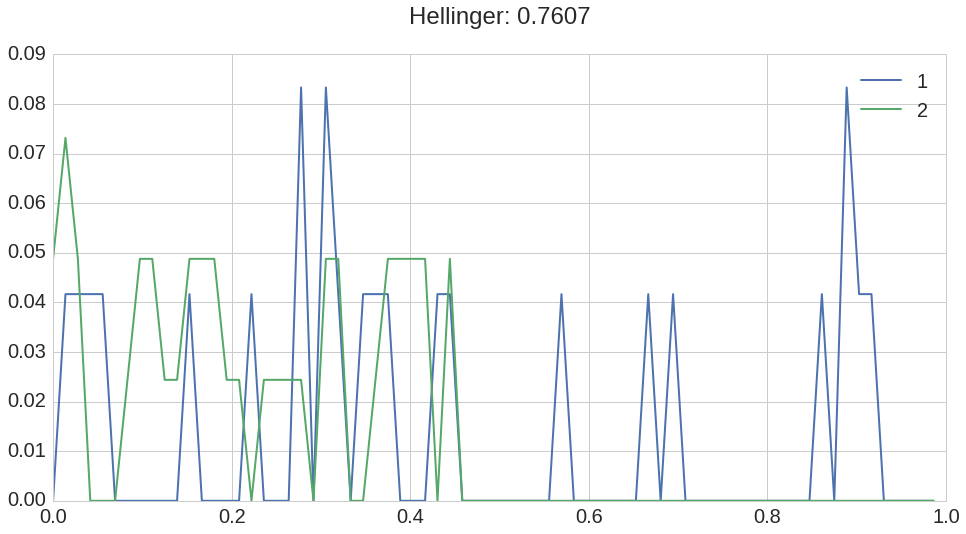

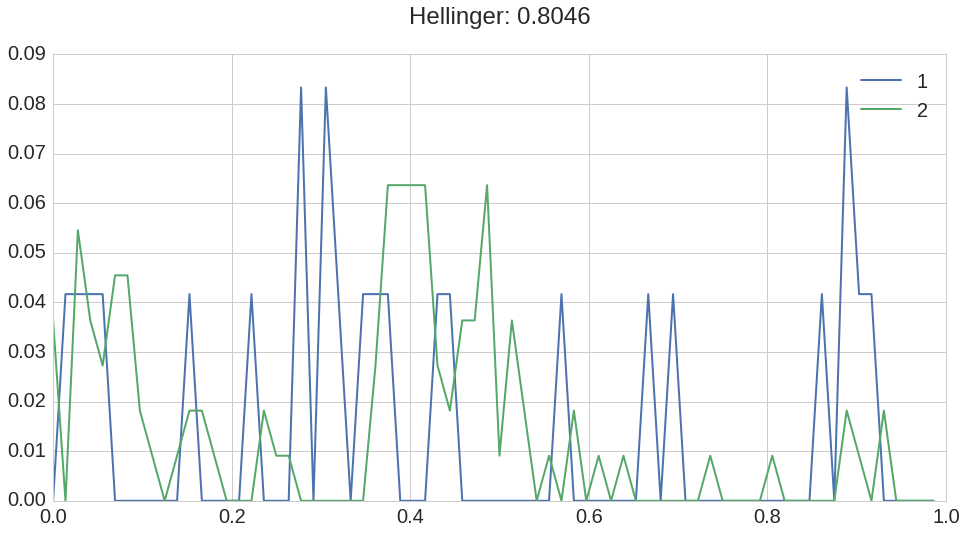

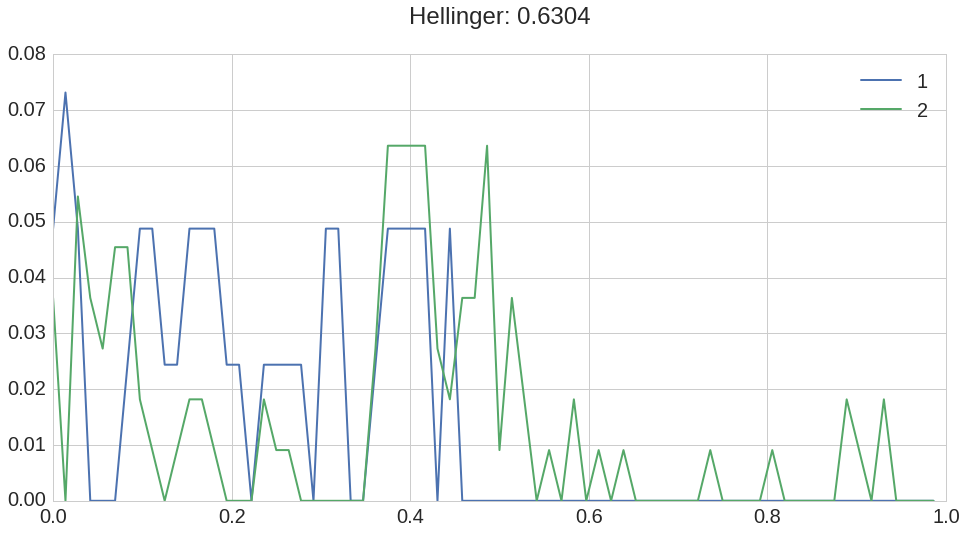

In [17]:
max_length = 72
xvals = [i * 20 / 60 / 24 for i in range(max_length)]
dists = []
for i, ID in enumerate(dc_dists_agents):
    if i > 6:
        break
#     if data_agents[ID]['battery_category'] != 'phev':
#         continue
    dist = list(dc_dists_agents[ID])
    while (len(dist) < max_length):
            dist.append(0.0)
    dist = dist[:max_length]
    dists.append(convert_to_normed_list(dist, max_length))
for i in range(len(dists)):
    for j in numpy.arange(i+1, len(dists)):
        hd = get_hellinger_distance(dists[i], dists[j])
        title = ('Hellinger: %.4f\n' %hd)
        simple_plot_mult_dist(xvals, [dists[i], dists[j]], 
            ['1', '2'], xmax = 1, linewidth = 2, title = title)
#[str(i) for i in range(len(dists))]

### Hellinger distance versus shifted error measure

In [11]:
dc_dists_agents = {}
for ID in data_agents:
    dc_dists_agents[ID] = battery_size_functions.sum_distributions(data_agents[ID]['disconnection_duration_dists'])

In [12]:
max_length = int(60 * 24 / bin_size)
xvals = [i * bin_size / 60 / 24 for i in range(max_length)]
dists = []
for i, ID in enumerate(dc_dists_agents):
    if i > 50:
        break
    dist = list(dc_dists_agents[ID])
    while (len(dist) < max_length):
            dist.append(0.0)
    dist = dist[:max_length]
    dists.append(battery_size_functions.convert_to_normed_list(dist, max_length))

In [13]:
fractions = []
plot_counter = 0
for i in range(len(dists)):
    for j in numpy.arange(i+1, len(dists)):
        hd = battery_size_functions.get_hellinger_distance(dists[i], dists[j])
        sd = battery_size_functions.get_shifting_distance(dists[i], dists[j])
#         if sd / hd > 0.85 or sd / hd < 0.40:
#             plot_counter +=1
#             if sd / hd > 0.85:
#                 title = ('Hellinger: %.4f\nShifting: %.4f\nFraction: %.3f\nShifting more negative on distance Hellinger' %(hd, sd, sd / hd))
#             else:
#                 title = ('Hellinger: %.4f\nShifting: %.4f\nFraction: %.3f\nShifting more positive on distance than Hellinger' %(hd, sd, sd / hd))

#             battery_size_functions.simple_plot_mult_dist(xvals, [dists[i], dists[j]], 
#                 ['1', '2'], xmax = 1, linewidth = 2, title = title)
#             if plot_counter > 19:
#                 break
        fractions.append(sd / hd)
#[str(i) for i in range(len(dists))]

In [14]:
p98 = numpy.percentile(fractions, 98)
p2 = numpy.percentile(fractions, 2)
p98, p2

(0.55105676602158526, 0.13092951012309106)

(array([  36.,   69.,  108.,  124.,  138.,  100.,  125.,  118.,  121.,
          98.,   55.,   51.,   41.,   33.,   20.,   16.,   11.,    3.,
           6.,    2.]),
 array([ 0.10787355,  0.13632785,  0.16478215,  0.19323646,  0.22169076,
         0.25014506,  0.27859937,  0.30705367,  0.33550797,  0.36396228,
         0.39241658,  0.42087088,  0.44932519,  0.47777949,  0.5062338 ,
         0.5346881 ,  0.5631424 ,  0.59159671,  0.62005101,  0.64850531,
         0.67695962]),
 <a list of 20 Patch objects>)

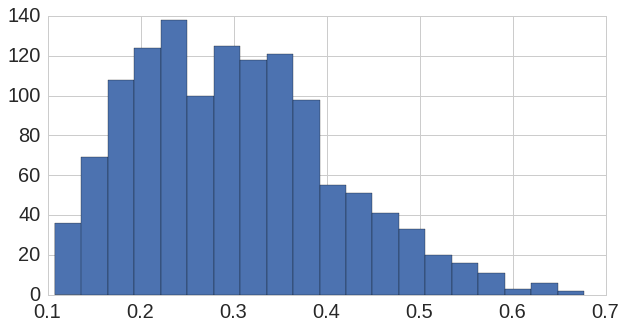

In [17]:
seaborn.set(style='whitegrid', font_scale=2)
fig = plt.figure(figsize=(10, 5))
plt.hist(fractions, bins = 20)

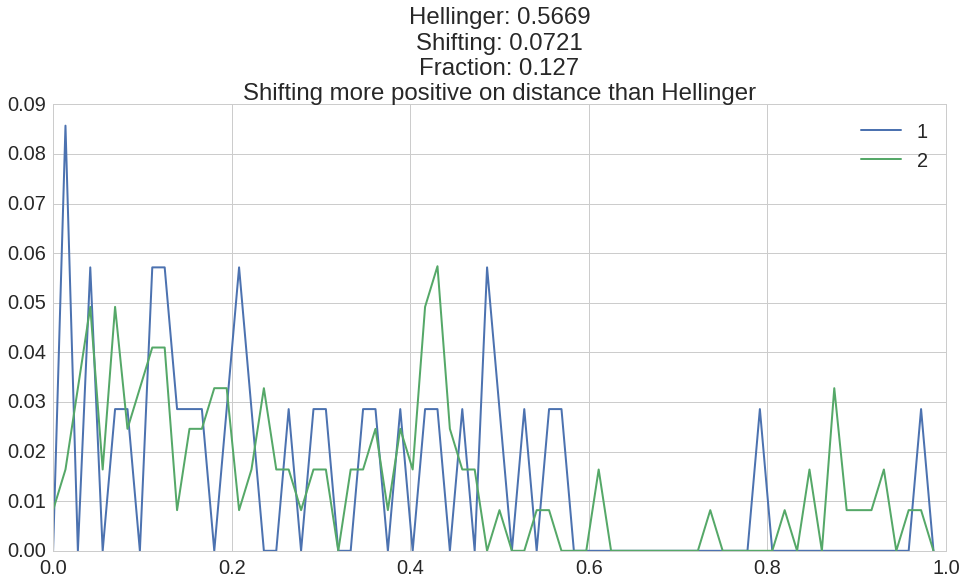

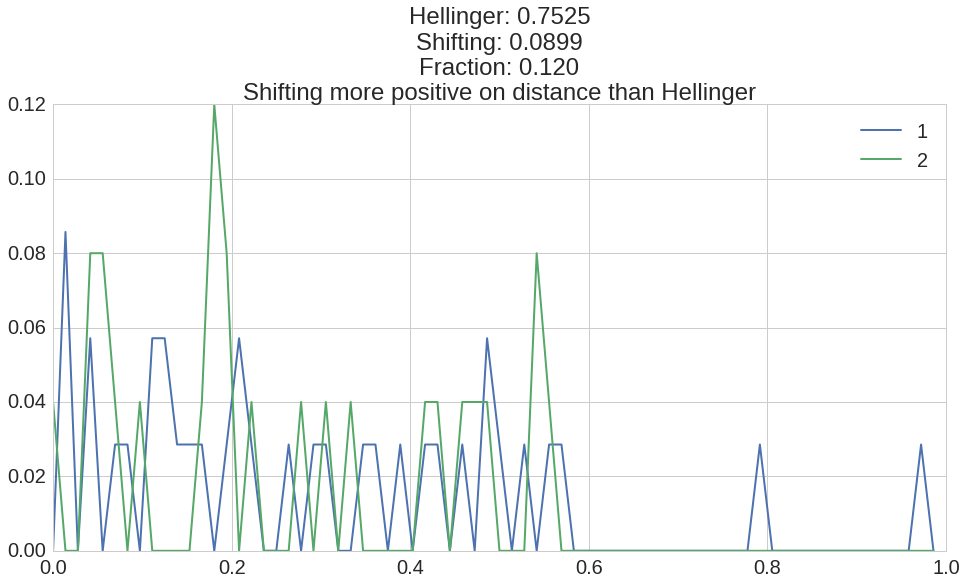

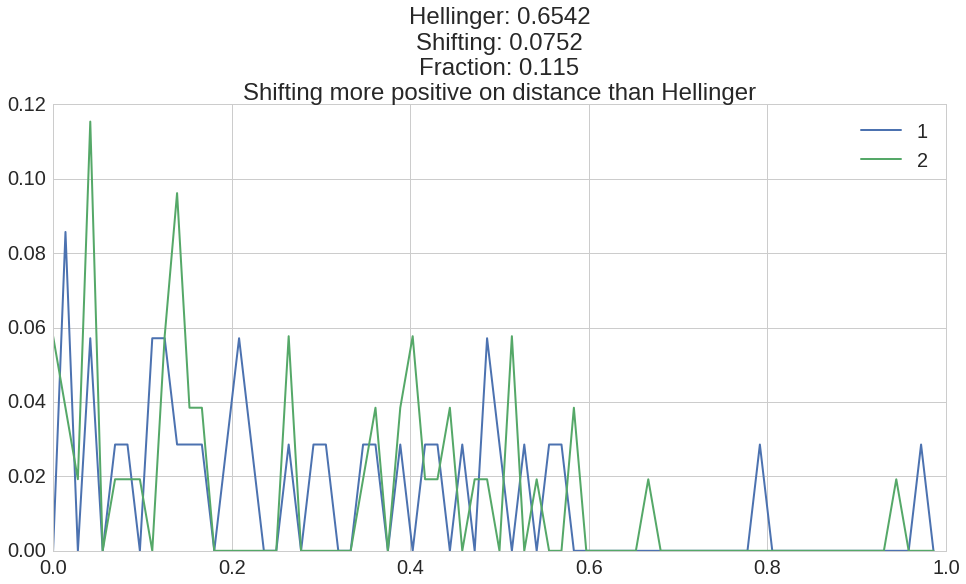

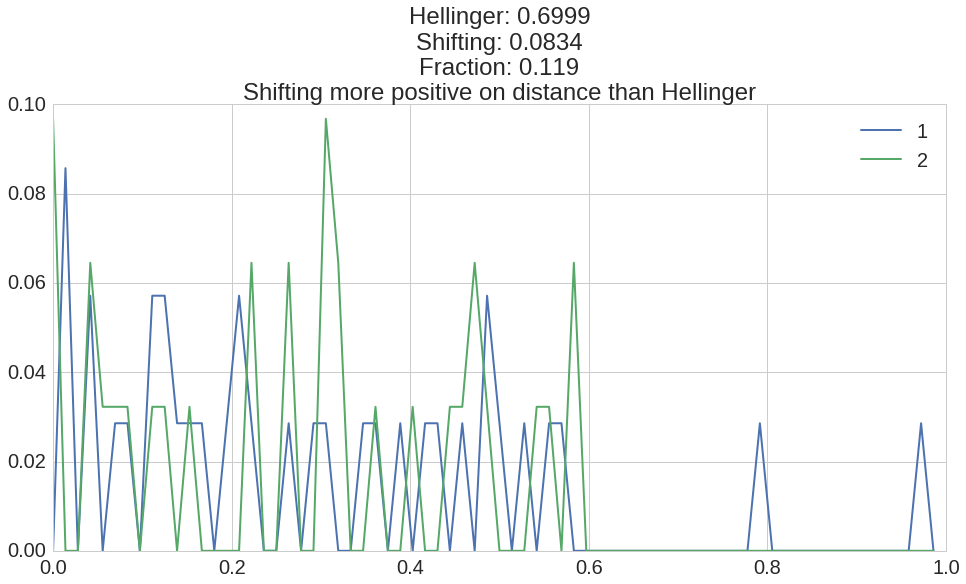

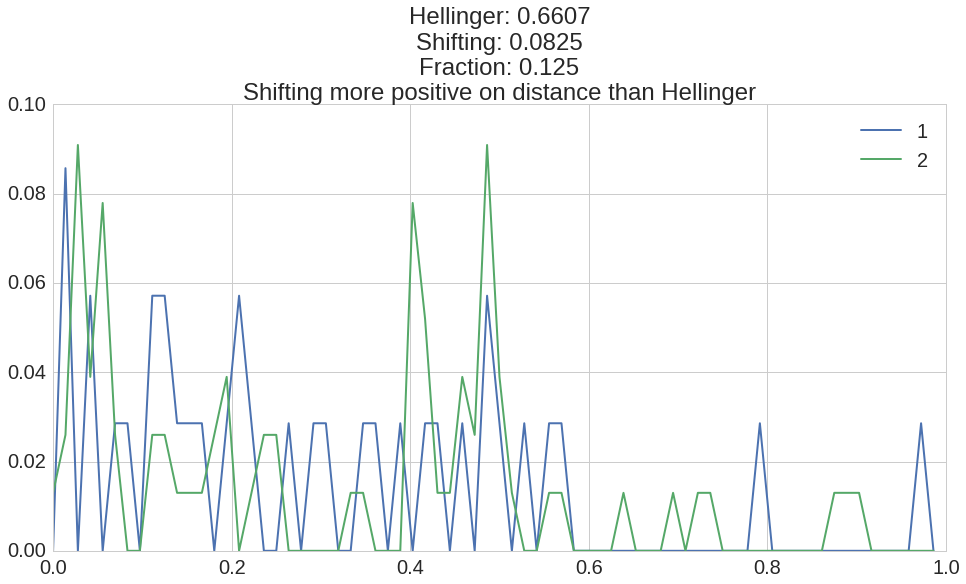

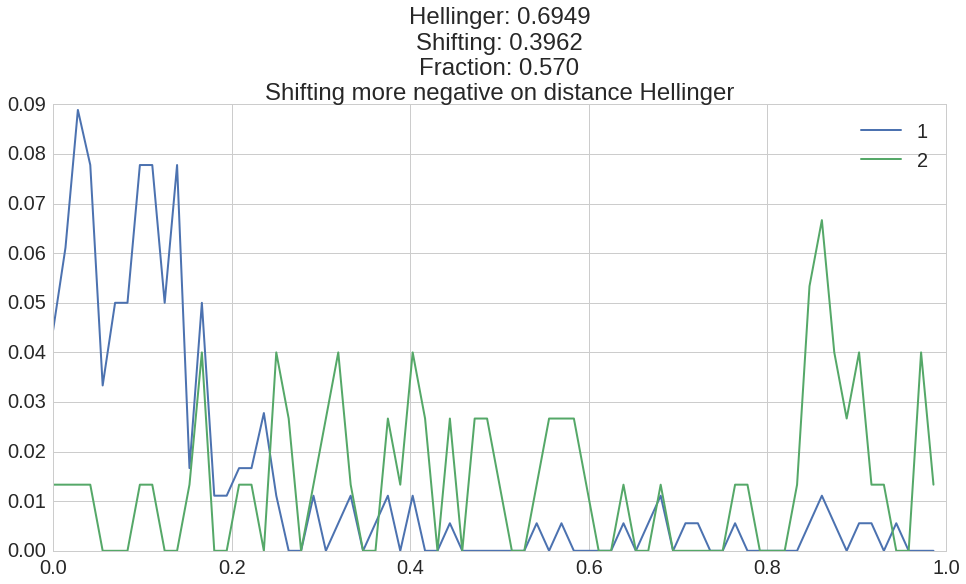

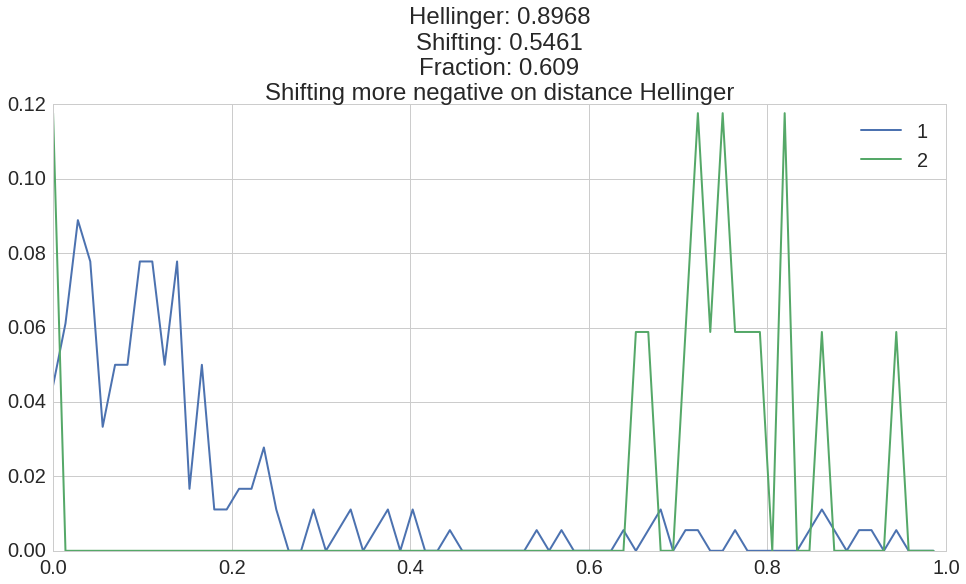

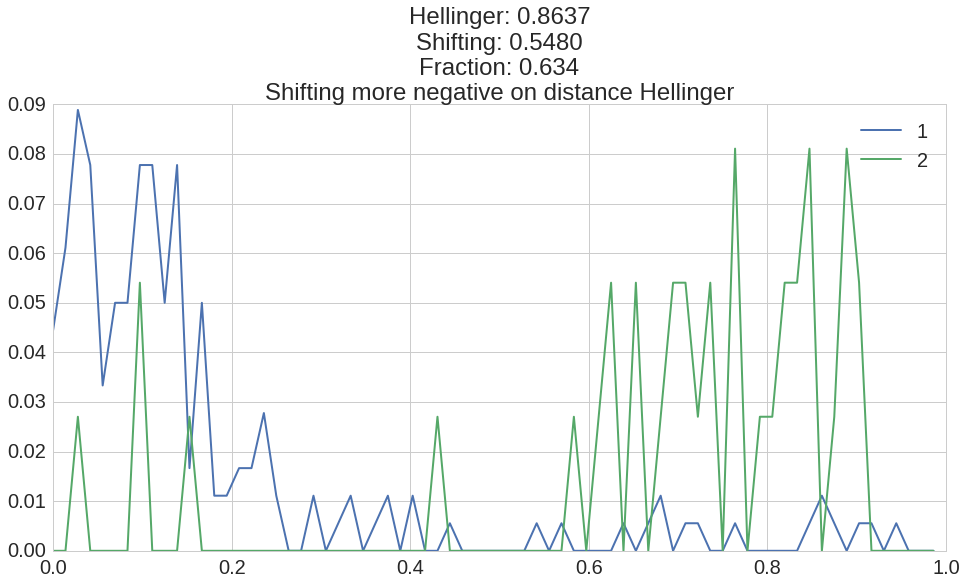

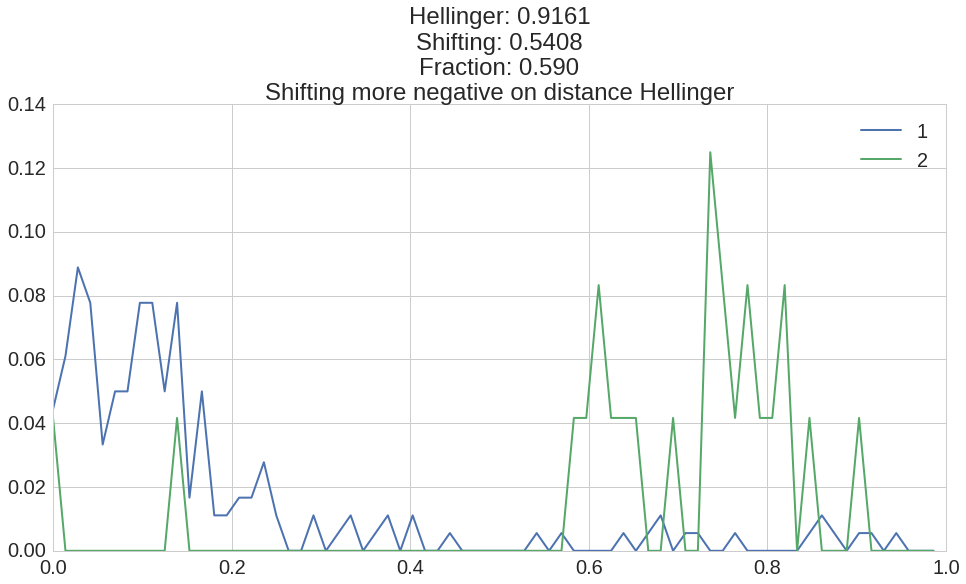

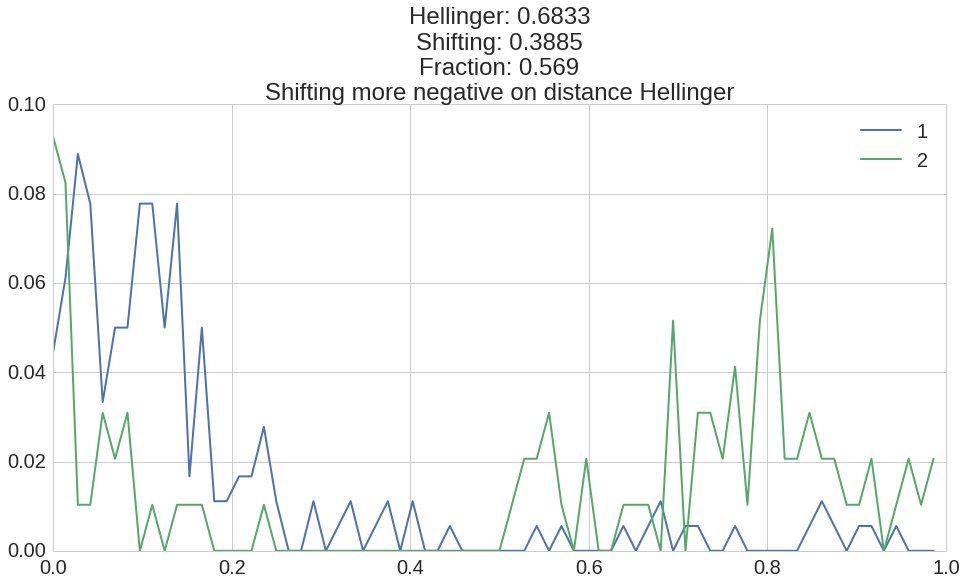

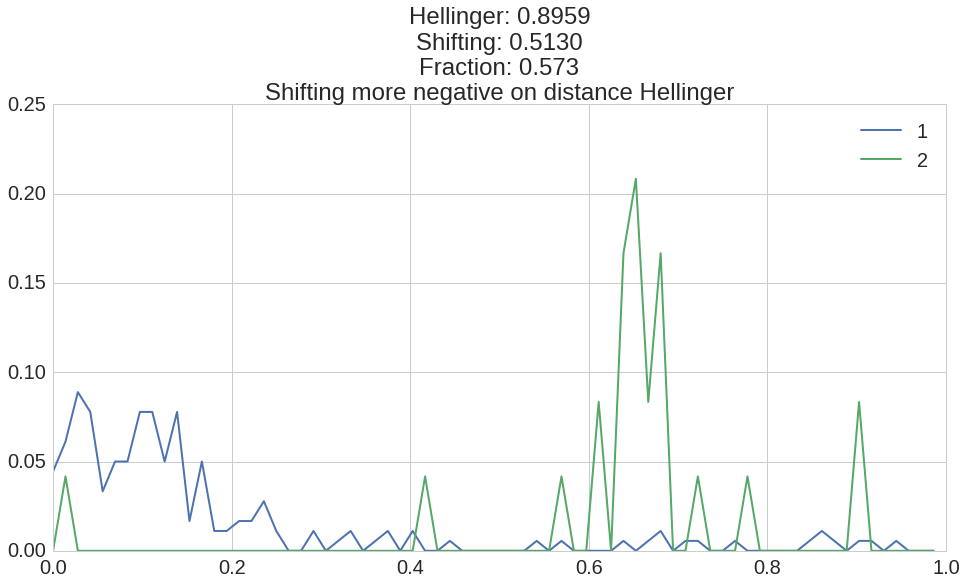

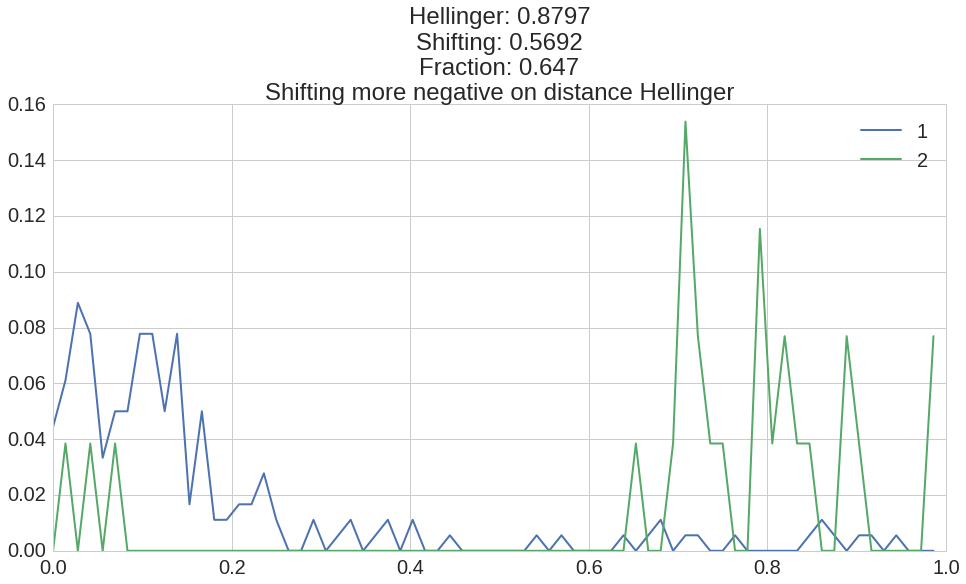

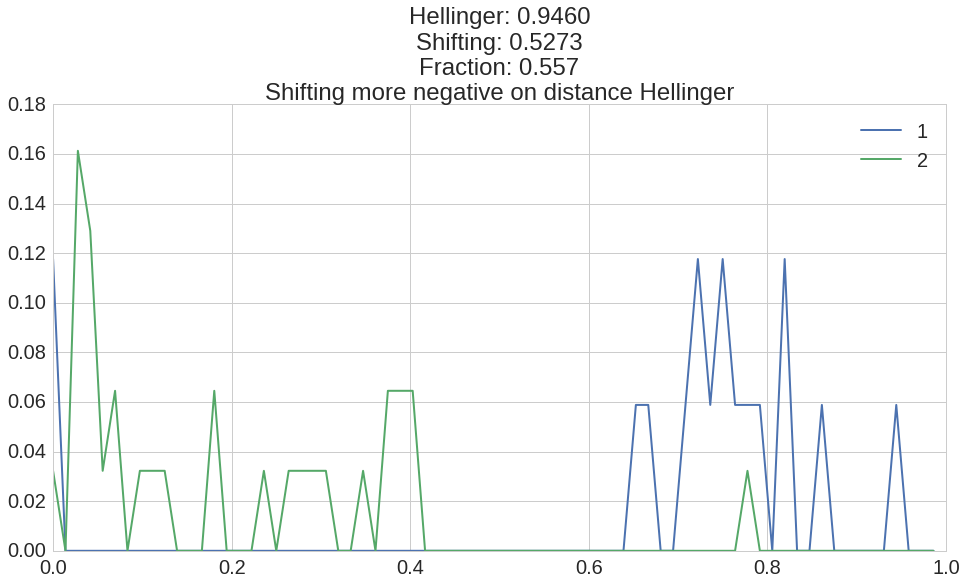

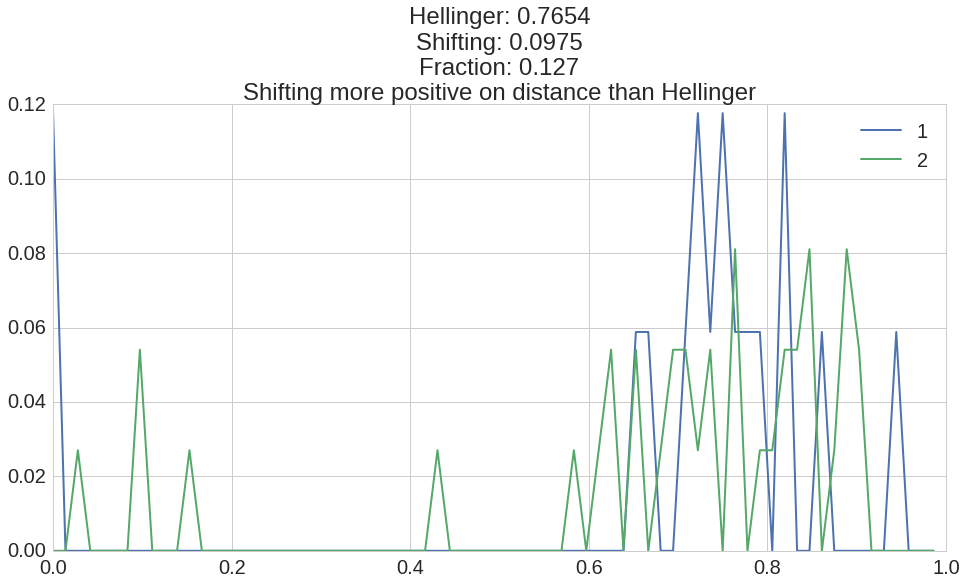

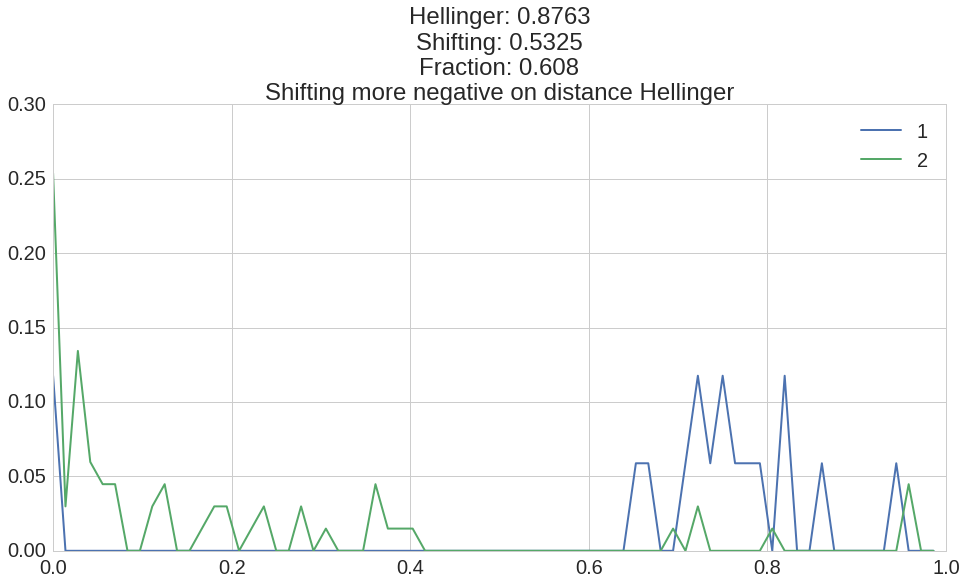

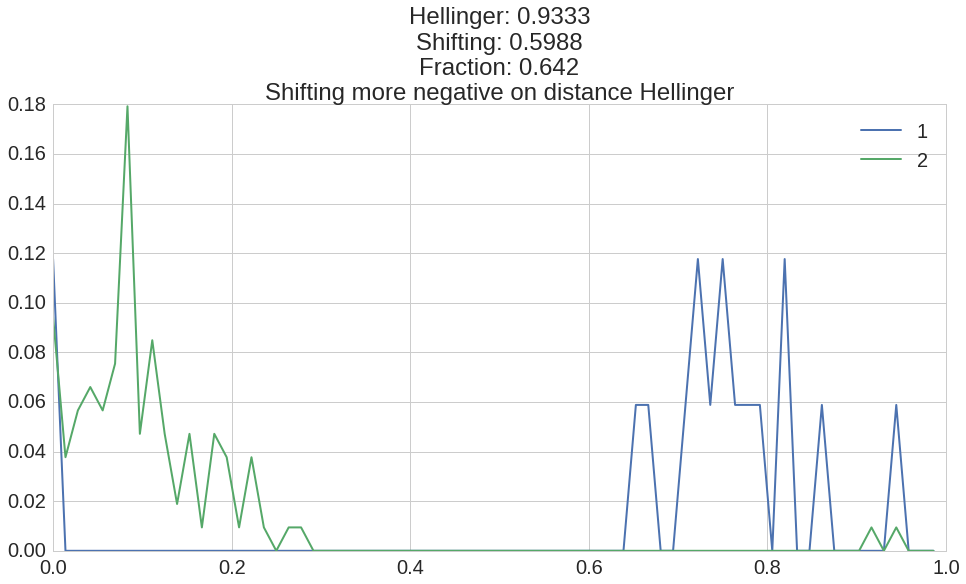

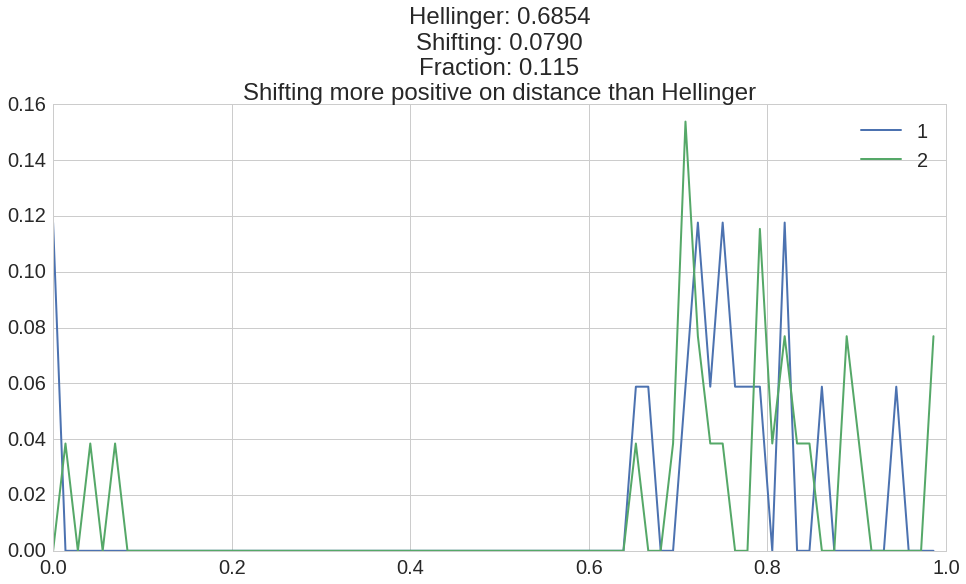

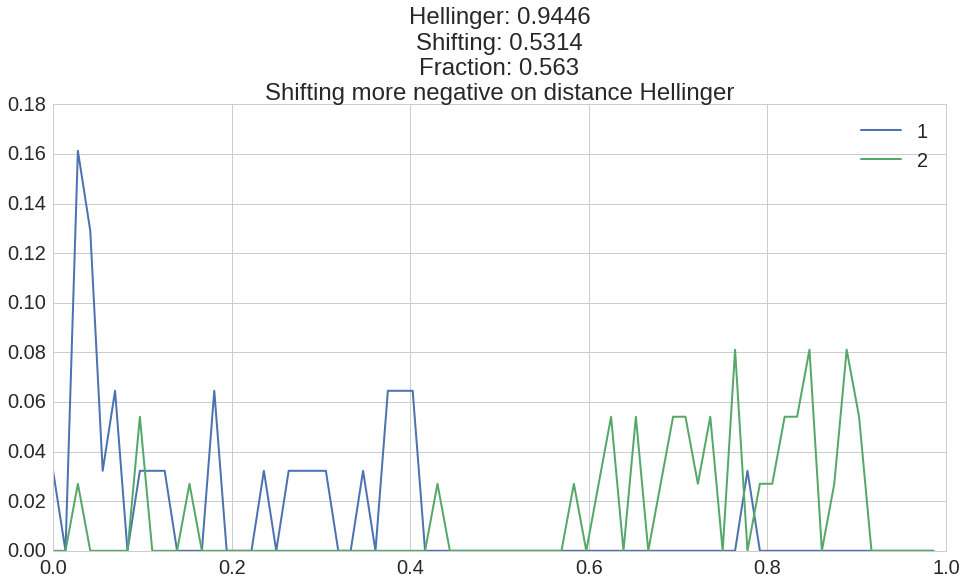

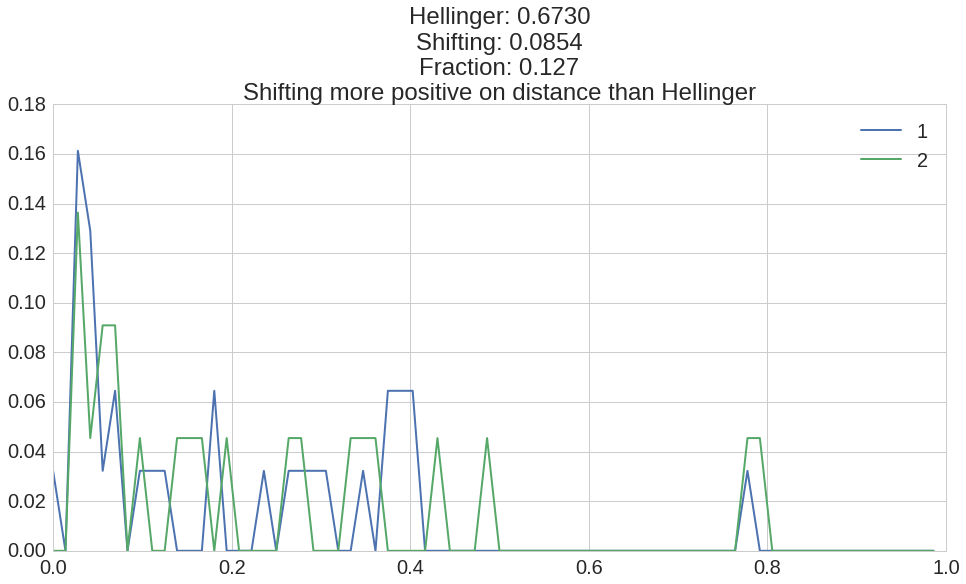

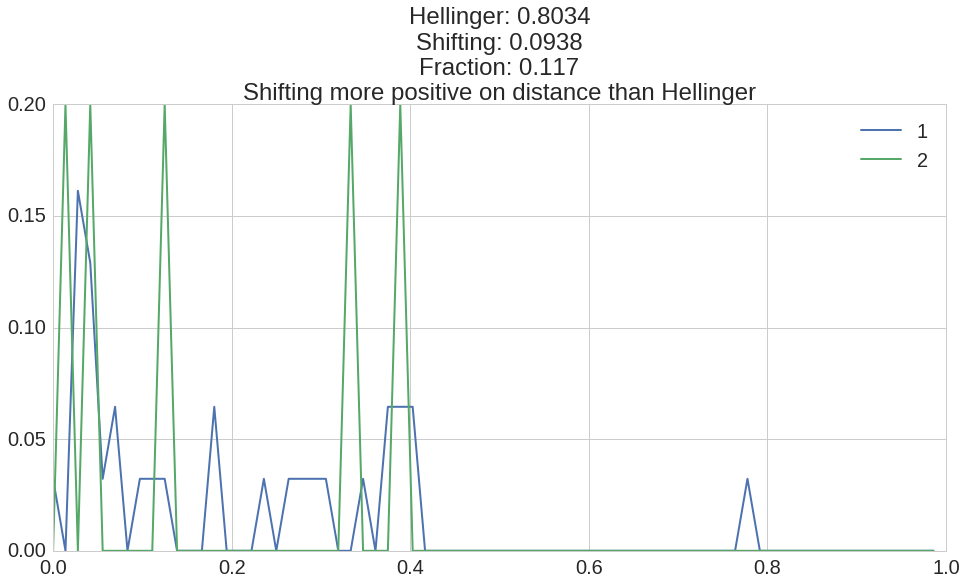

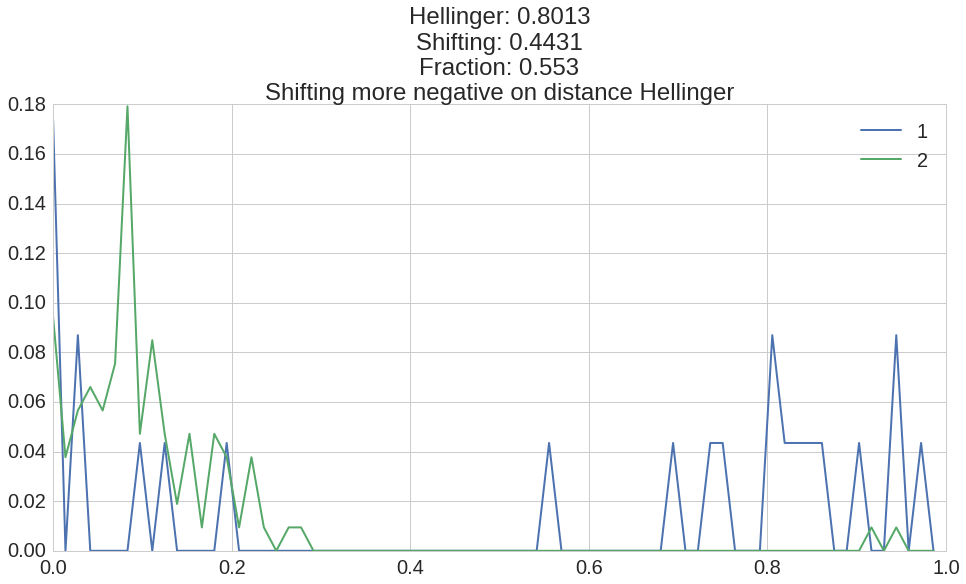

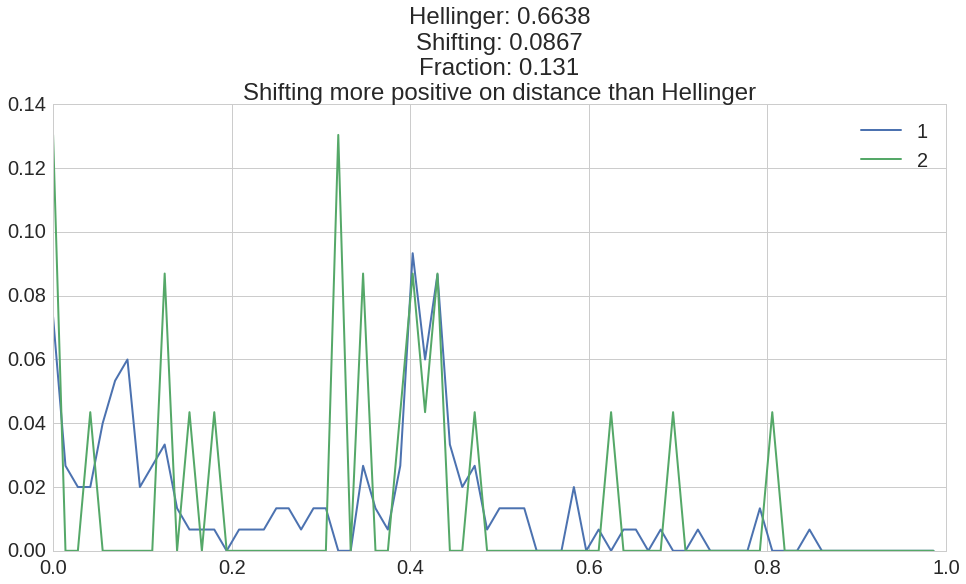

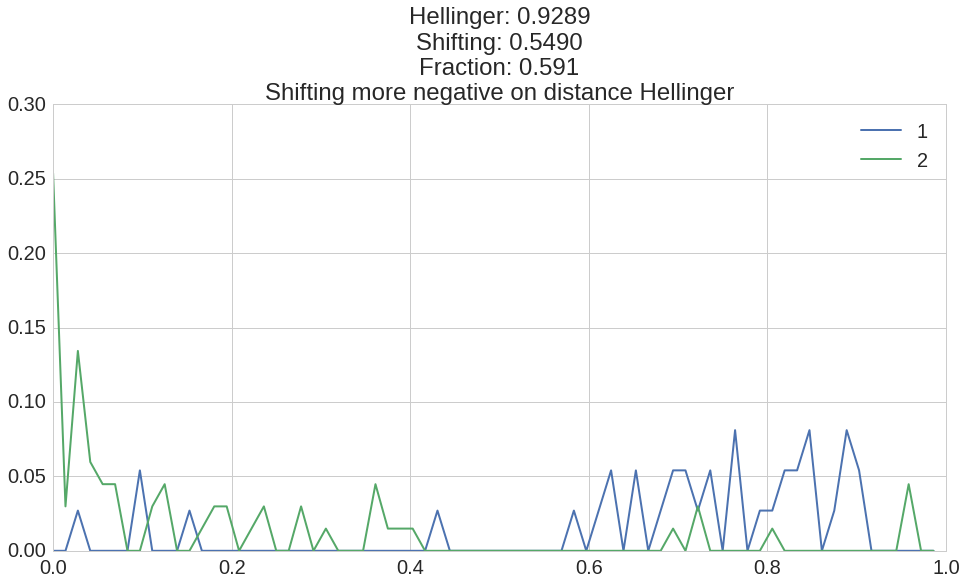

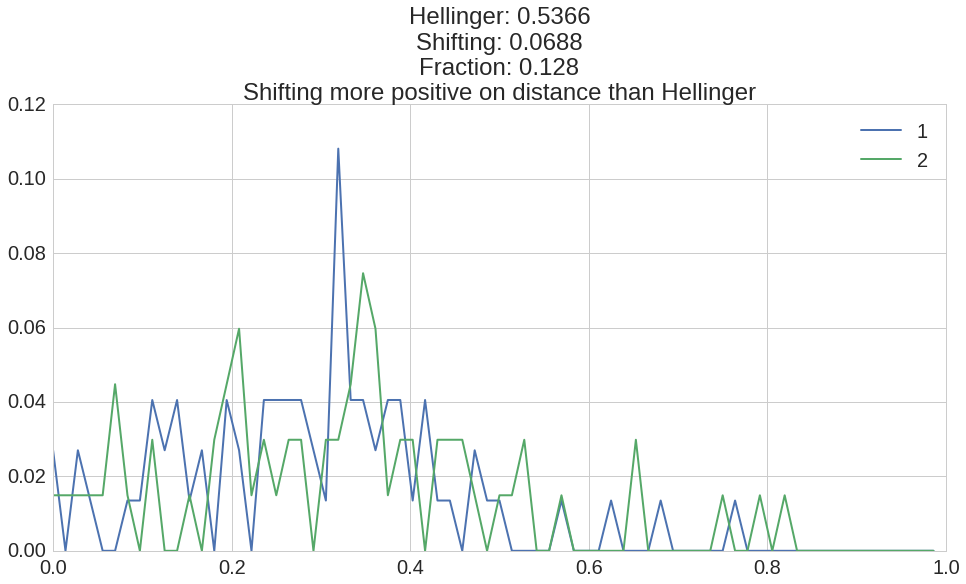

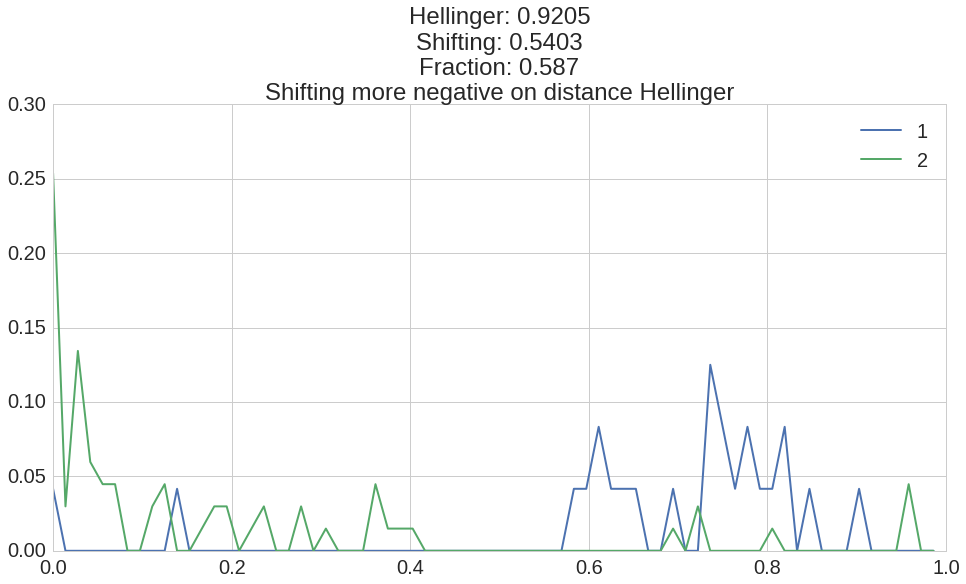

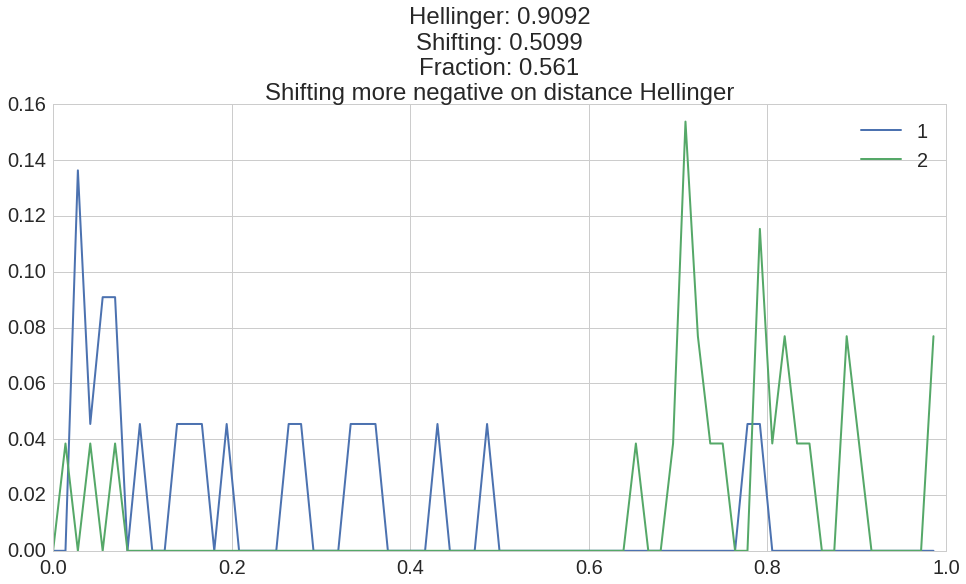

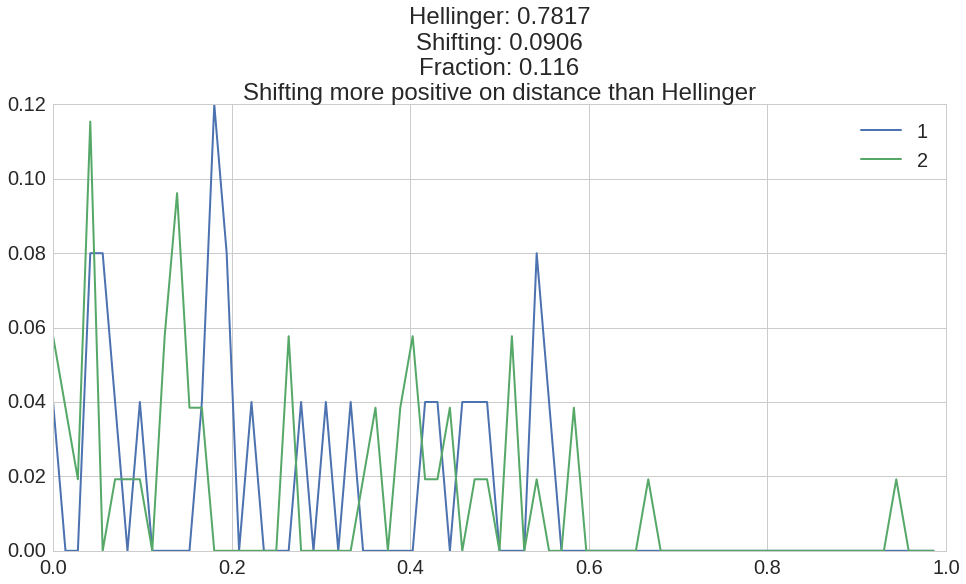

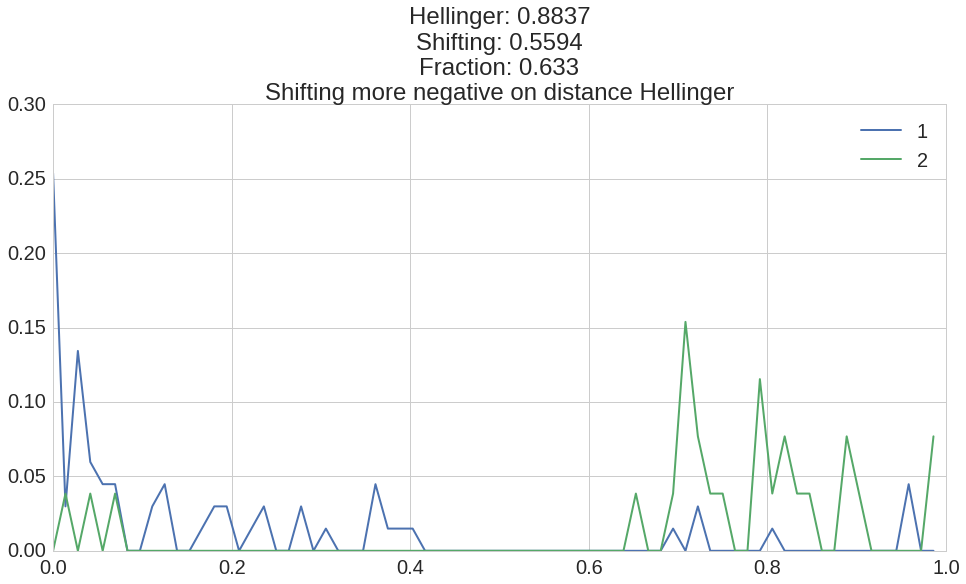

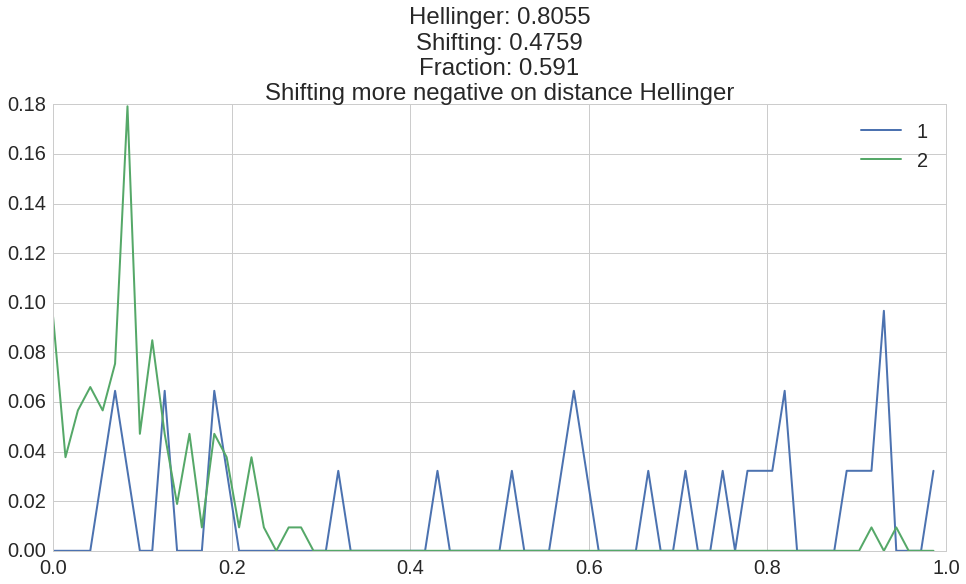

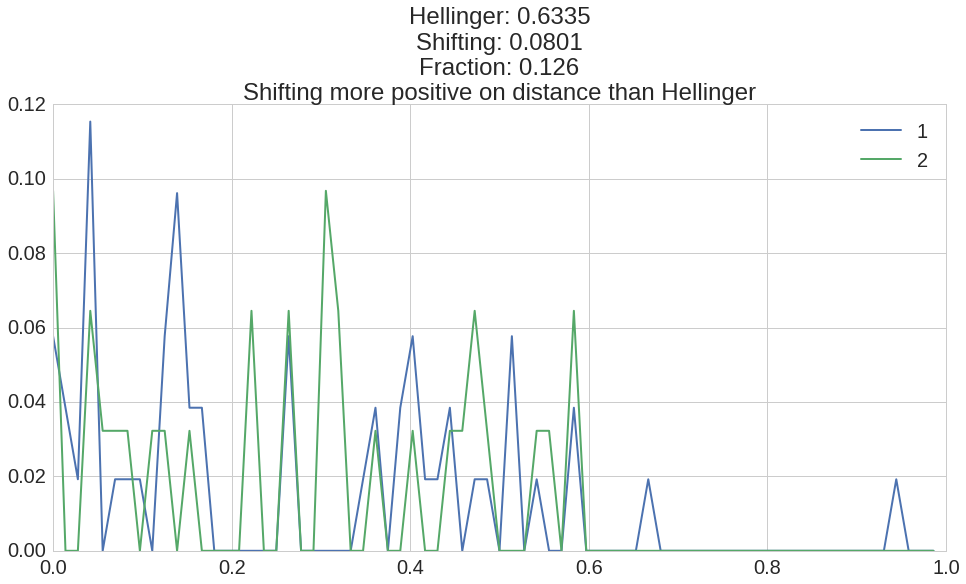

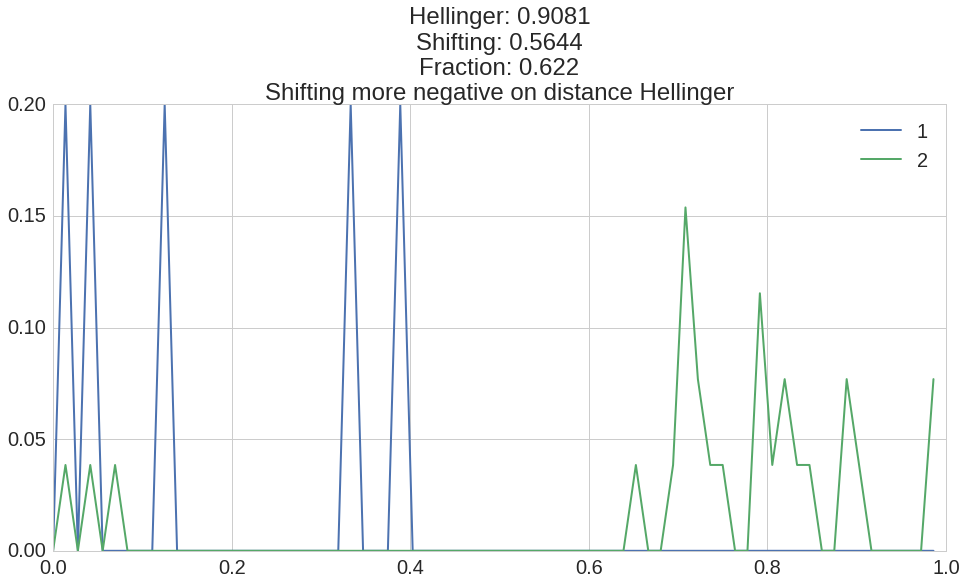

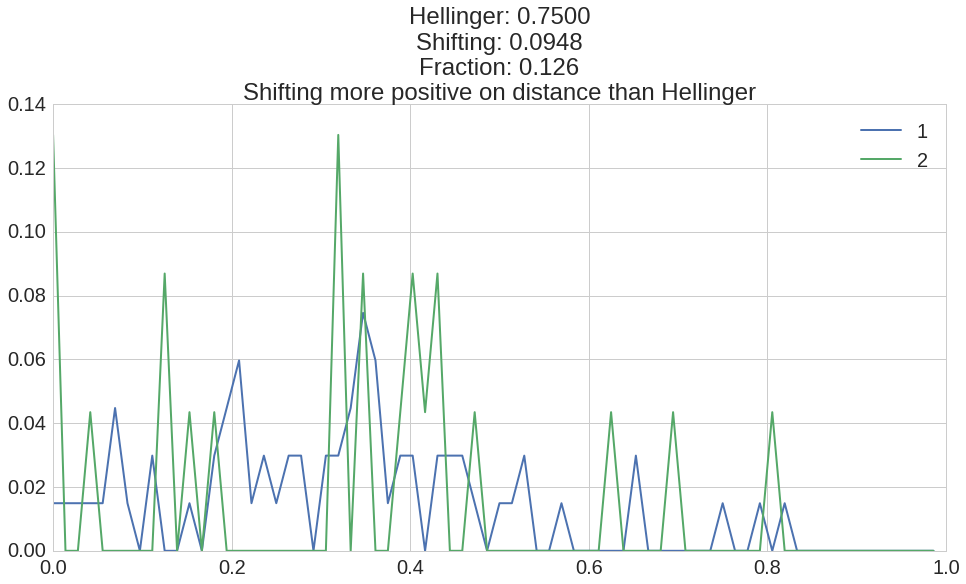

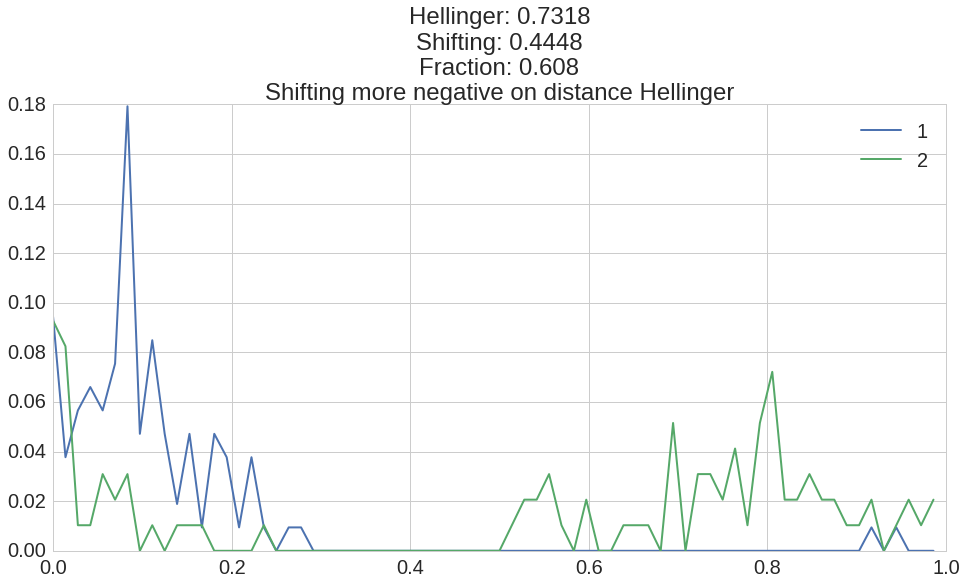

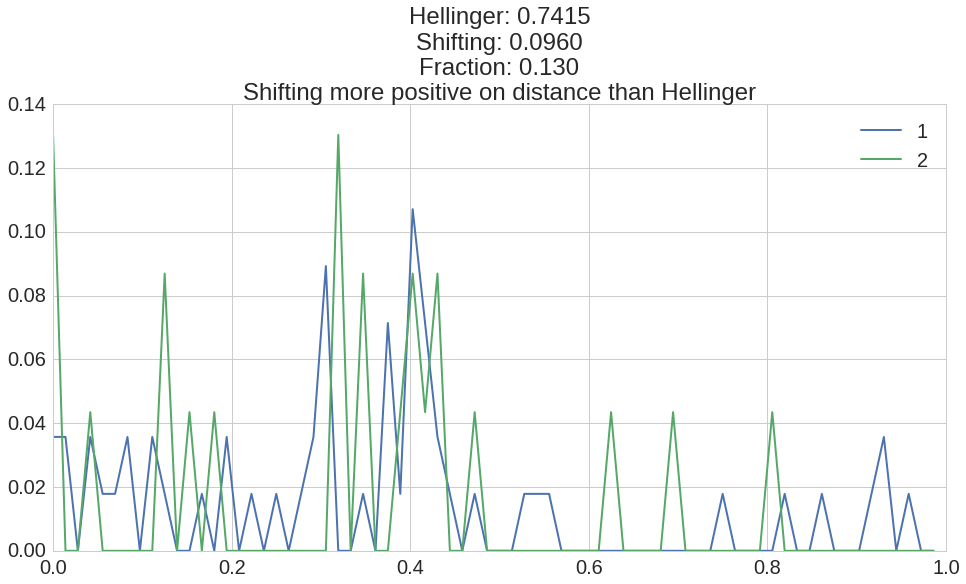

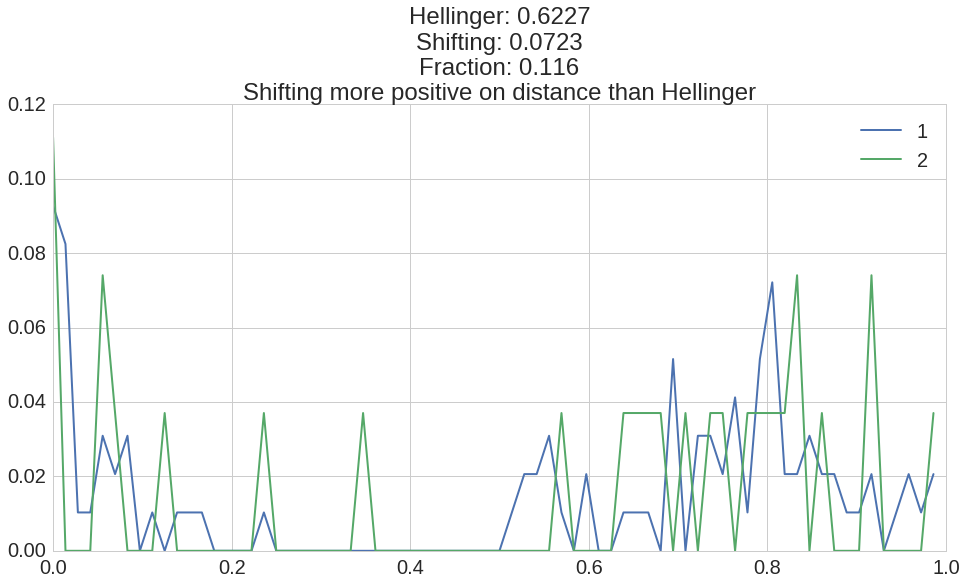

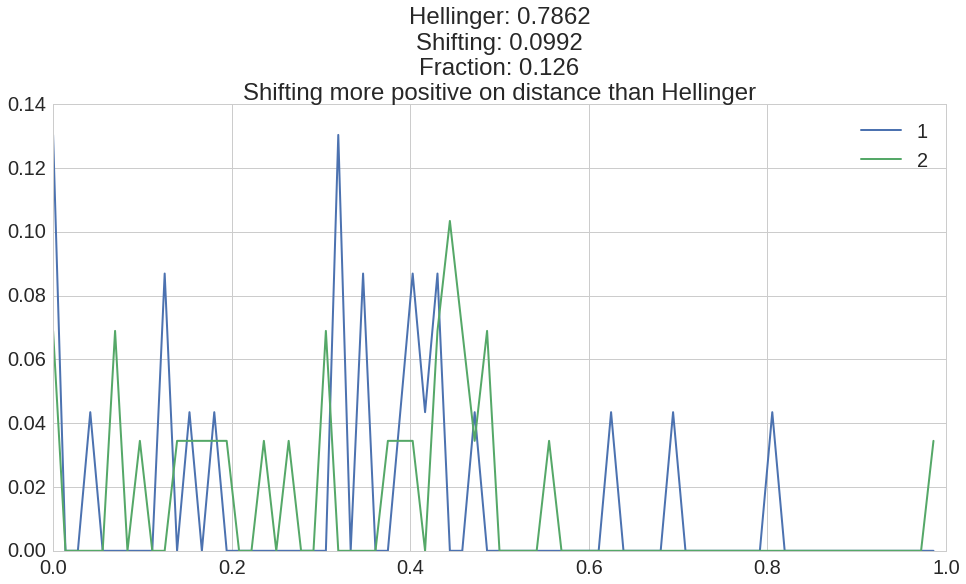

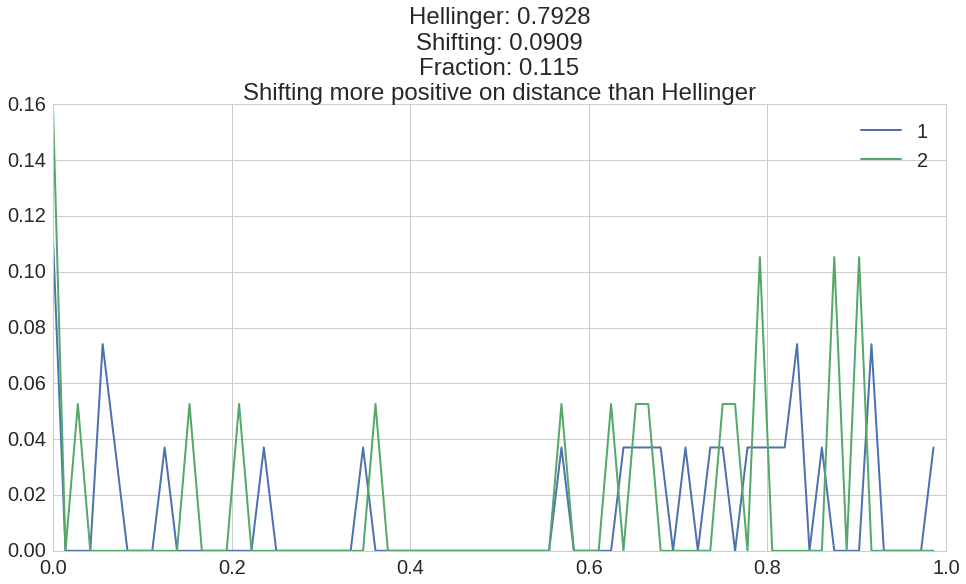

In [20]:
# fractions = []
plot_counter = 0
for i in range(len(dists)):
    for j in numpy.arange(i+1, len(dists)):
        hd = battery_size_functions.get_hellinger_distance(dists[i], dists[j])
        sd = battery_size_functions.get_shifting_distance(dists[i], dists[j])
        if sd / hd > p98 or sd / hd < p2:
            plot_counter +=1
            if sd / hd > p98:
                title = ('Hellinger: %.4f\nShifting: %.4f\nFraction: %.3f\nShifting more negative on distance Hellinger' %(hd, sd, sd / hd))
            else:
                title = ('Hellinger: %.4f\nShifting: %.4f\nFraction: %.3f\nShifting more positive on distance than Hellinger' %(hd, sd, sd / hd))

            battery_size_functions.simple_plot_mult_dist(xvals, [dists[i], dists[j]], 
                ['1', '2'], xmax = 1, linewidth = 2, title = title)
            if plot_counter > 19:
                break
#         fractions.append(sd / hd)
#[str(i) for i in range(len(dists))]